# Proyecto Identificador de tipo de mango


# Clasificación de Mangos: Podrido o Maduro

En este proyecto, se emplearán modelos de inteligencia artificial (IA) para clasificar mangos según su estado, 
determinando si están **podridos** o **maduros**. Este proceso se fundamenta en la aplicación de técnicas avanzadas 
de procesamiento de datos e imágenes, así como en el entrenamiento de modelos de aprendizaje automático y aprendizaje 
profundo para alcanzar un alto nivel de precisión en la clasificación.

La metodología seguirá un enfoque sistemático que incluye las siguientes etapas:
1. **Recolección de Datos**
2. **Preprocesamiento de Datos**
3. **Selección y Entrenamiento del Modelo**
4. **Evaluación del Modelo**
5. **Implementación y Pruebas**
6. **Conclusión y Mejora Continua**


## 1. Preprocesamiento de Datos

En esta etapa, se prepararán los datos para su uso en el modelo. Esto incluye:
- **Para Imágenes**:
  - Escalado y normalización.
  - Aumentación de datos para mejorar la generalización del modelo.
- **Para Datos Tabulares**:
  - Limpieza de datos para manejar valores faltantes.
  - Análisis exploratorio para identificar patrones relevantes.


## 2. Selección y Entrenamiento del Modelo

- Evaluación de diferentes algoritmos de clasificación:
  - Árboles de decisión.
  - Bosques aleatorios.
  - Regresión logística.
  - Perceptrón multicapa (MLP).
- Uso de herramientas como GridSearchCV para ajustar los hiperparámetros y optimizar el rendimiento del modelo.


## 3. Evaluación del Modelo

El modelo será validado utilizando las siguientes métricas:
- **Precisión**: Qué porcentaje de predicciones son correctas.
- **Recall**: Capacidad del modelo para identificar cada clase correctamente.
- **F1-score**: Balance entre precisión y recall.
- **Matriz de confusión**: Para visualizar los errores en cada clase.


# Identificador de mangos maduros o prodidos por regresion logistica

# 1. Importación de Librerías Necesarias

En esta sección, importamos las librerías que serán utilizadas en el análisis y construcción de nuestro modelo de clasificación. A continuación, se presenta una breve descripción de cada una:



In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import joblib


- `numpy`: Biblioteca para trabajar con matrices y funciones matemáticas de alto nivel.
- `matplotlib.pyplot`: Herramienta para generar visualizaciones gráficas.
- `os`: Módulo para interactuar con el sistema operativo y manejar archivos.
- `cv2`: Biblioteca de OpenCV para el procesamiento de imágenes.
- `pandas`: Biblioteca para manipulación y análisis de datos estructurados.
- `seaborn`: Herramienta para crear visualizaciones estadísticas atractivas.
- `sklearn.model_selection.train_test_split`: Función para dividir los datos en conjuntos de entrenamiento y prueba.
- `sklearn.preprocessing.MinMaxScaler`: Herramienta para escalar los datos, normalizando las features.
- `sklearn.linear_model.LogisticRegression`: Modelo de clasificación lineal mediante regresión logística.
- `joblib`:Libreria para guardar los modelos generados

# 2. Creación de Carpetas para Almacenamiento de Imágenes en Escala de Grises

En esta sección, configuramos el entorno para almacenar las imágenes procesadas en escala de grises. Estas carpetas separarán las imágenes según su tipo (maduras o podridas) y su propósito (entrenamiento o prueba).



In [2]:
carpeta_grises_ripe=os.path.join(r"./Ripe_gray")
carpeta_grises_rotten=os.path.join(r"./Rotten_gray")
carpeta_grises_ripe_test=os.path.join(r"./Ripe_gray_test")
carpeta_grises_rotten_test=os.path.join(r"./Rotten_gray_test")

if not os.path.exists(carpeta_grises_ripe) and not os.path.exists(carpeta_grises_rotten) and not os.path.exists(carpeta_grises_ripe_test) and not os.path.exists(carpeta_grises_rotten_test):
  os.mkdir(carpeta_grises_ripe)
  os.mkdir(carpeta_grises_rotten)
  os.mkdir(carpeta_grises_ripe_test)
  os.mkdir(carpeta_grises_rotten_test)

- `carpeta_grises_ripe`: Almacenará imágenes de mangos maduros en escala de grises para el conjunto de entrenamiento.
- `carpeta_grises_rotten`: Almacenará imágenes de mangos podridos en escala de grises para el conjunto de entrenamiento.
- `carpeta_grises_ripe_test`: Almacenará imágenes de mangos maduros en escala de grises para el conjunto de prueba.
- `carpeta_grises_rotten_test`: Almacenará imágenes de mangos podridos en escala de grises para el conjunto de prueba.

El bloque de código verifica si estas carpetas existen y, si no es así, las crea usando `os.mkdir`.


# 3. Conversión de Imágenes a Escala de Grises

Aquí definimos una función llamada `convertToGray` que convierte imágenes de una carpeta de entrada a escala de grises y las guarda en una carpeta de salida. Este proceso es importante para simplificar el análisis de imágenes y reducir la complejidad de los datos para el modelo de clasificación.

In [2]:
def convertToGray(path_images, path_results):
    # Recorrer todas las imágenes en la carpeta de entrada
    for archivo in os.listdir(path_images):
        # Filtrar solo por imágenes
        if archivo.endswith((".jpg", ".jpeg", ".png")):
            # Abrir imagen
            ruta_imagen = os.path.join(path_images, archivo)
            imagen = cv2.imread(ruta_imagen)

            # Convertir a escala de grises
            imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

            # Guardar imagen en carpeta de salida
            nombre_salida = os.path.join(path_results, f"gris_{archivo}")
            cv2.imwrite(f'{nombre_salida}', imagen_gris)

convertToGray(r"./Ripe",r"./ripe_gray")
convertToGray(r"./Rotten",r"./unripe_gray")

### Descripción de la Función

- **Parámetros de Entrada**:
  - `path_images`: Ruta de la carpeta que contiene las imágenes originales.
  - `path_results`: Ruta de la carpeta donde se guardarán las imágenes convertidas en escala de grises.

- **Pasos del Código**:
  1. Iteramos sobre los archivos de la carpeta de entrada (`path_images`) y seleccionamos solo los archivos de imágenes (`jpg`, `jpeg`, `png`).
  2. Cargamos cada imagen con `cv2.imread` y la convertimos a escala de grises con `cv2.cvtColor`.
  3. Guardamos la imagen en la carpeta de destino (`path_results`) con el prefijo `gris_` para diferenciarlas.

# 4. Visualización de Imágenes en Escala de Grises

En esta sección, definimos la función `SeeImage` para abrir y visualizar una de las imágenes procesadas en escala de grises. Esto nos permite verificar visualmente que las imágenes se hayan guardado correctamente en la carpeta de destino.

In [ ]:
#ahora abrimos alguna imagen para ver si nuestras imagenes se guardaron bien

def SeeImage(path_image):
  img = cv2.imread(path_image)
  plt.pyplot.imshow(img)
  plt.pyplot.show()

SeeImage("./Ripe_gray/gris_109.jpg")

### Descripción de la Función

- **Parámetro de Entrada**:
  - `path_image`: Ruta de la imagen que se desea visualizar.

- **Pasos del Código**:
  1. La función carga la imagen desde la ruta especificada usando `cv2.imread`.
  2. La visualiza usando `plt.imshow` de Matplotlib, lo cual permite mostrar la imagen en el notebook para inspeccionar la calidad de la conversión.

- **Uso de la Función**: La función se ejecuta a continuación para visualizar una de las imágenes en la carpeta `Ripe_gray`:
  
  ```python
  SeeImage("./Ripe_gray/gris_109.jpg")


# 5. Creación del DataFrame a Partir de las Imágenes

En esta sección, definimos la función `makeDataFrame`, que toma las imágenes convertidas en escala de grises y las transforma en un formato tabular. El objetivo es crear un DataFrame que pueda ser utilizado para entrenar el modelo de clasificación de mangos podridos y maduros.



In [3]:
def makeDataFrame(path_images,rotten=0,data=[]):
    for archivo in os.listdir(path_images):
        # Filtrar solo por imágenes
        if archivo.endswith((".jpg", ".jpeg", ".png")):
            # Abrir imagen
            ruta_imagen = os.path.join(path_images, archivo)
            imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

            #Aplanar la imagen para convertirla en una sola fila
            img_flattened = imagen.flatten()
            #Ignoramos las imagenes que no sean de 224*224
            if img_flattened.__len__() > 50176:
                continue

            #Añadir los datos de la imagen a la lista y agregamos la columna a predecir
            data.append(list(img_flattened) + [rotten])




    
data = []
makeDataFrame(r"./Ripe_grises",rotten=0,data=data)
makeDataFrame(r"./Rotten_grises",rotten=1,data=data)
df = pd.DataFrame(data)

### Descripción de la Función

- **Parámetros de Entrada**:
  - `path_images`: Ruta de la carpeta con las imágenes en escala de grises.
  - `rotten`: Etiqueta de clase (0 para mangos maduros y 1 para podridos) que se asignará a cada imagen.
  - `data`: Lista donde se almacenarán los datos de las imágenes y sus etiquetas.

- **Pasos del Código**:
  1. Iteramos sobre los archivos de la carpeta de imágenes y filtramos solo aquellos que son formatos de imagen (`jpg`, `jpeg`, `png`).
  2. Cargamos la imagen en escala de grises con `cv2.imread`.
  3. Aplanado de Imágenes: Convertimos cada imagen en una sola fila de píxeles mediante `flatten()` para que cada fila represente una imagen.
  4. Filtramos las imágenes que no tienen un tamaño de `224x224` píxeles, omitiéndolas si su tamaño supera `50176` píxeles.
  5. Agregamos cada fila de datos a la lista `data`, junto con la etiqueta de clase `rotten` (0 o 1).



# 6. Renombrado de Columnas y Optimización de Tipos de Datos

En esta sección, realizamos dos pasos importantes para mejorar la legibilidad y la eficiencia de nuestro DataFrame. Renombramos las columnas de manera que sean descriptivas y transformamos los tipos de datos de las columnas, lo cual ayuda a reducir el uso de memoria.




In [4]:
#ahora renombramos todas las columnas para que sean mas entendibles para nosotros
df.columns = [f"pixel_{i}" for i in range(df.shape[1] - 1)] + ["rotten"]
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
#convertimos todas las columnas que tengan float a uint8 (0-255)
df = df.astype({col: 'uint8' for col in df.select_dtypes(include='float').columns})

### Descripción de las Operaciones

- **Renombrado de Columnas**:
  - Cambiamos los nombres de las columnas de cada píxel en un formato comprensible (`pixel_0`, `pixel_1`, etc.) para representar la posición de cada píxel en la imagen.
  - La última columna se llama `"rotten"` e indica si el mango es maduro (`0`) o podrido (`1`).

- **Limpieza de Valores Inválidos**:
  - Eliminamos filas que contienen valores como `NaN`, `inf` y `-inf`, asegurándonos de que todos los datos sean válidos y consistentes para el análisis.

- **Conversión de Tipos de Datos**:
  - Convertimos todas las columnas que contienen datos en tipo `float` al tipo `uint8` (enteros entre 0 y 255), que es el rango de valores de un píxel en imágenes en escala de grises. Esto optimiza el uso de memoria y facilita la interpretación de los valores de píxeles.


In [5]:
#mostramos nuestro data frame
print("--- DataFrame created ---")
print(df)

--- DataFrame created ---
      pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1802        0        0        0        0        0        0        0        0   
1803        0        0        0        0        0        0        0        0   
1804        0        0        0        0        0        0        0        0   
1805        0        0        0        0        0        0        0        0   
1806        0        0        0        0        0        0        0        0   

      pixel_8

# 7. Eliminación de Variables Cuasi-Constantes

En esta etapa, eliminamos características del DataFrame que tienen baja variabilidad entre las muestras, es decir, aquellas que son constantes o casi constantes. Esto ayuda a reducir la dimensionalidad del dataset y a mejorar la eficiencia del modelo, evitando características que aportan poca información relevante para la clasificación. En este caso nos podemos dar cuenta que no elimina ninguna columna, por lo tanto en nuestros datos todas las columnas aportan informacion.

In [6]:
#Eliminamos las varianbles que son constantes en la mayoria de los casos
from sklearn.feature_selection import VarianceThreshold
# Configura el threshold para el filtro de varianza. En este caso, 0.01 
selector = VarianceThreshold(threshold=0.01)
# Aplica el filtro a los datos
df_reduced = selector.fit_transform(df)

# Mostrar el resultado en un DataFrame nuevo
df_reduced = pd.DataFrame(df_reduced, columns=df.columns[selector.get_support()])

print("DataFrame después de eliminar características cuasi-constantes:")
print(df_reduced)

DataFrame después de eliminar características cuasi-constantes:
      pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1798        0        0        0        0        0        0        0        0   
1799        0        0        0        0        0        0        0        0   
1800        0        0        0        0        0        0        0        0   
1801        0        0        0        0        0        0        0        0   
1802        0        0        0        0        0       

### Descripción del Proceso

- **Selección de Características por Varianza**:
  - Usamos `VarianceThreshold` de `sklearn.feature_selection` para filtrar aquellas columnas que tienen una varianza por debajo de un umbral específico. En este caso, configuramos un umbral de `0.01`, lo que significa que las columnas cuya varianza es menor a este valor serán eliminadas.

- **Aplicación del Filtro**:
  - Aplicamos el filtro de varianza a nuestro DataFrame para reducir las dimensiones.
  - Creamos un nuevo DataFrame `df_reduced`, que contiene solo las características que superaron el umbral de varianza.

- **Resultado Final**:
  - Este proceso ayuda a optimizar los datos y reducir la carga computacional del modelo al eliminar características que no contribuyen significativamente al análisis.

In [7]:
#vemos informacion sobre como es nuestro data frame
print("--- DataFrame info ---")
df_reduced.info()

--- DataFrame info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Columns: 50177 entries, pixel_0 to rotten
dtypes: uint64(50177)
memory usage: 690.2 MB


# 8. Análisis del Balance de Clases

En esta sección, analizamos la distribución de las clases en el dataset para identificar posibles desbalances entre las etiquetas. Es importante entender esta distribución porque un desbalance significativo puede afectar el rendimiento del modelo al entrenarlo, inclinándolo a predecir mayormente la clase mayoritaria. Ademas de esto no se utiliza el dataframe que fue pasado por el filtro de las Cuasi-Constantes, ya que, este termino siendo igual a nuestro primer data frame.

--- DataFrame shape ---


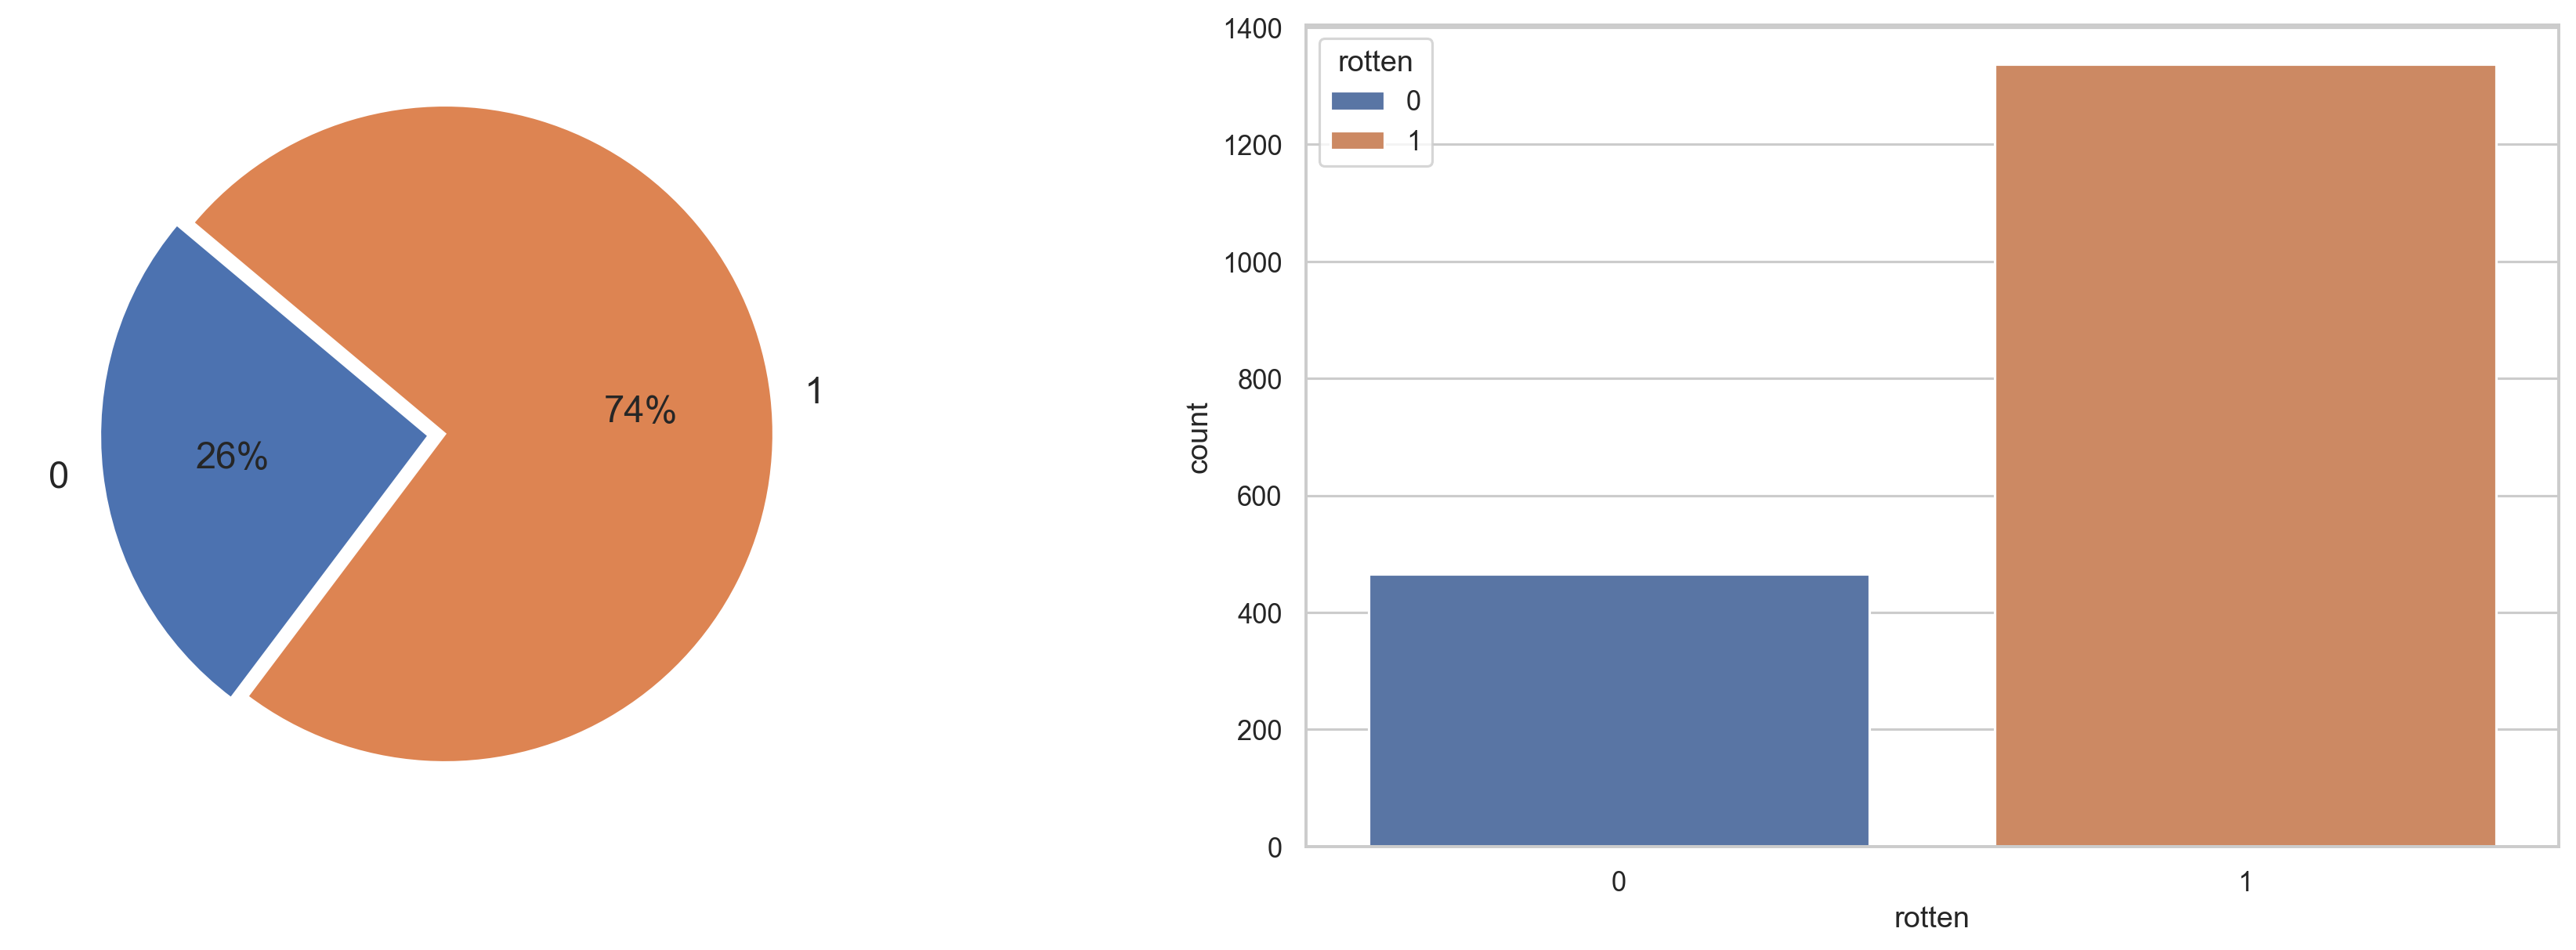

           pixel_0      pixel_1      pixel_2      pixel_3      pixel_4  \
count  1803.000000  1803.000000  1803.000000  1803.000000  1803.000000   
mean      0.084304     0.073211     0.077648     0.085413     0.082640   
std       1.935013     2.095439     2.405267     2.631117     2.539443   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max      74.000000    84.000000    99.000000   108.000000   103.000000   

           pixel_5      pixel_6      pixel_7      pixel_8      pixel_9  ...  \
count  1803.000000  1803.000000  1803.000000  1803.000000  1803.000000  ...   
mean      0.084304     0.089296     0.089850     0.093733     0.107044  ...   
std       2.609552     2.786983     2.744528     2.839702     2.880754  ...   
min       0.00000

In [11]:
#vemos cuantos datos de entrenamiento para cada caso tenemos:
print("--- DataFrame shape ---")
labels = df['rotten'].unique()
dist = (df['rotten'].value_counts()).to_numpy()
dist = dist[::-1]


sns.set(style="whitegrid")

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(dist, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.countplot(df, x="rotten", hue='rotten')

plt.show()
print(df.describe())

### Observación del Balance

- **Distribución de Clases**:
  - Calculamos la cantidad de muestras para cada etiqueta (`rotten`) y visualizamos la proporción de datos usando un gráfico de pastel.
  - Utilizamos un gráfico de barras para complementar el análisis visual y destacar las diferencias en las cantidades de cada clase.

- **Desbalance de Clases**:
  - Notamos que existe un desbalance en los datos: hay más imágenes de mangos podridos (`rotten = 1`) que de mangos buenos (`rotten = 0`).
  - Este desbalance puede influir en el modelo al sesgar sus predicciones hacia la clase mayoritaria.
- **Media de las columnas**:
  - Se puede ver como la media de todas las columnas es mayor que 0 por eso mismo en la eliminacion Cuasi-constantes no se elimino ninguna columna

# 9. Preparación de los Datos y Entrenamiento del Modelo

En esta sección, preparamos los datos para entrenar un modelo de regresión logística que nos permita predecir si un mango está podrido (`rotten = 1`) o no (`rotten = 0`). Este modelo se entrenará utilizando las características procesadas previamente y la etiqueta objetivo.





In [9]:
#preparamos los datos para entrenar a nuestro modelo y entrenamos al mismo, en nuestro caso es un modelo de regresion lineal logistica

# Paso 1: Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['rotten'])  # Las características son todas las columnas menos 'rotten'
y = df['rotten']  # La columna 'rotten' es lo que queremos predecir

# Normaliza las características
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


# Paso 2: Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Paso 3: Crear y entrenar el modelo de regresión lineal
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Pasos Realizados

#### 1. Separación de las Características y la Variable Objetivo
- **Características (X)**: Todas las columnas excepto la columna `rotten`, que contiene la etiqueta objetivo.
- **Variable Objetivo (y)**: La columna `rotten`, que indica si el mango está podrido (1) o no (0).

#### 2. Normalización de los Datos
- Para escalar las características a un rango entre 0 y 1, utilizamos `MinMaxScaler` de `sklearn`. Esto ayuda a mejorar la estabilidad y el rendimiento del modelo, especialmente cuando las características tienen diferentes escalas.

#### 3. División del Dataset
- Dividimos los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%) utilizando `train_test_split` de `sklearn`. Esto asegura que podamos evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento.

#### 4. Entrenamiento del Modelo
- Usamos una regresión logística con `sklearn.linear_model.LogisticRegression`.
- Configuramos un máximo de iteraciones (`max_iter=1000`) para garantizar que el modelo converja durante el entrenamiento.


# 10. Evaluación del Modelo

En esta sección, evaluamos el rendimiento de nuestro modelo de regresión logística utilizando el conjunto de prueba. Los resultados se analizan en términos de precisión (accuracy) y se comparan las predicciones realizadas con los valores reales.


Accuracy: 79.22%
Predicciones totales: 361
Total de predicciones correctas: 286.0


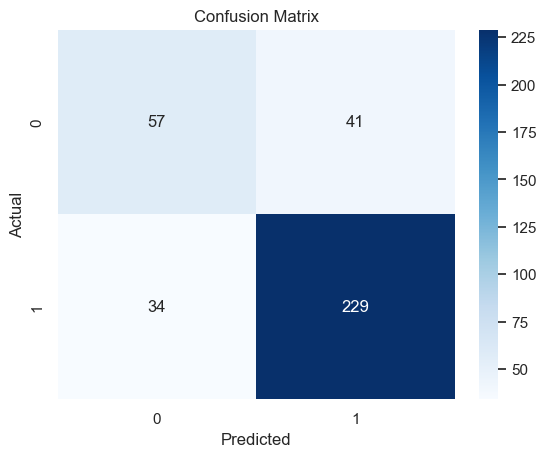

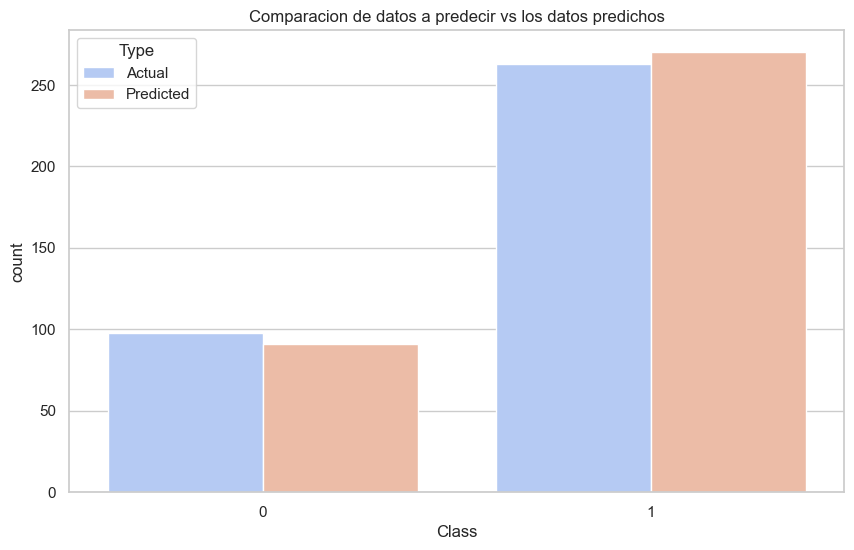

In [24]:
#ahora probamos nuestro modelo:
# Paso 4: Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)


# Paso 5: Evaluar el modelo
accuracy = np.mean(y_pred == y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f'Predicciones totales: {len(y_pred)}')
print(f'Total de predicciones correctas: {len(y_pred)*accuracy}')

# Añadir una columna para diferenciar entre valores reales y predicciones
comparison_melted = comparison.melt(value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Class')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Crear el gráfico de conteo
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Type', data=comparison_melted, palette='coolwarm')
plt.title('Comparacion de datos a predecir vs los datos predichos')
plt.show()




### Pasos Realizados

#### 1. Predicciones en el Conjunto de Prueba
- Utilizamos el modelo entrenado para predecir la etiqueta (`rotten`) de las imágenes en el conjunto de prueba.

#### 2. Cálculo de la Precisión
- Calculamos la precisión (accuracy) como el porcentaje de predicciones correctas sobre el total de predicciones realizadas.

#### 3. Comparación de Valores Reales y Predicciones
- Creamos un DataFrame para comparar las predicciones con los valores reales (`Actual` vs. `Predicted`).
- Generamos un gráfico que muestra la distribución de las clases predichas frente a las reales.

### Resultados Obtenidos

- **Accuracy**: 79.22%
- **Predicciones Totales**: 361
- **Total de Predicciones Correctas**: 286
- **Tendencia del Modelo**: El modelo tiende a seleccionar más la clase `1` (mango podrido) que la clase `0` (mango bueno).

### Conclusión
Aunque el modelo tiene un buen desempeño con una precisión del 79.22%, muestra un leve sesgo hacia la clase `1`. Este comportamiento podría mejorarse ajustando el balance de clases durante el entrenamiento (por ejemplo, utilizando técnicas como **SMOTE**) o ajustando los hiperparámetros del modelo.

In [11]:
#Pasamos a gris nuestras imagenes de validacion
convertToGray(r"./FondoMaduroV",r"./Ripe_gray_test")
convertToGray(r"./FondoPodridoV",r"./Rotten_gray_test")

./Ripe_gray_test\gris_135.png
./Ripe_gray_test\gris_137.png
./Ripe_gray_test\gris_141.png
./Ripe_gray_test\gris_142.png
./Ripe_gray_test\gris_146.png
./Ripe_gray_test\gris_16.png
./Ripe_gray_test\gris_17.png
./Ripe_gray_test\gris_188.png
./Ripe_gray_test\gris_193.png
./Ripe_gray_test\gris_195.png
./Ripe_gray_test\gris_199.png
./Ripe_gray_test\gris_200.png
./Ripe_gray_test\gris_203.png
./Ripe_gray_test\gris_205.png
./Ripe_gray_test\gris_206.png
./Ripe_gray_test\gris_21.png
./Ripe_gray_test\gris_255.png
./Ripe_gray_test\gris_26.png
./Ripe_gray_test\gris_27.png
./Ripe_gray_test\gris_30.png
./Ripe_gray_test\gris_31.png
./Ripe_gray_test\gris_36.png
./Ripe_gray_test\gris_39.png
./Ripe_gray_test\gris_41.png
./Ripe_gray_test\gris_410.png
./Ripe_gray_test\gris_425.png
./Ripe_gray_test\gris_426.png
./Ripe_gray_test\gris_429.png
./Ripe_gray_test\gris_430.png
./Ripe_gray_test\gris_432.png
./Ripe_gray_test\gris_442.png
./Ripe_gray_test\gris_444.png
./Ripe_gray_test\gris_60.png
./Ripe_gray_test\gris

In [16]:
#Creamos nuestro dataset de prueba
data_test=[]
makeDataFrame(r"./Ripe_gray_test",rotten=0,data=data_test)
makeDataFrame(r"./Rotten_gray_test",rotten=1,data=data_test)
df_test=pd.DataFrame(data_test)

In [17]:
#ahora renombramos todas las columnas para que sean mas entendibles para nosotros
df_test.columns = [f"pixel_{i}" for i in range(df_test.shape[1] - 1)] + ["rotten"]
df_test = df_test[~df_test.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
#convertimos todas las columnas que tengan float a uint8 (0-255)
df_test = df_test.astype({col: 'uint8' for col in df_test.select_dtypes(include='float').columns})

In [18]:
#vemos informacion sobre como es nuestro data frame de validacion
print("--- DataFrame info ---")
df_test.info()

--- DataFrame info ---
<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Columns: 50177 entries, pixel_0 to rotten
dtypes: uint64(1), uint8(50176)
memory usage: 9.5 MB


In [19]:
#preparamos los datos de prueba para ver como rinde nuestro modelo en un escenario "real"

# Paso 1: Separar las características (X) y la variable objetivo (y)
X_test_validation = df_test.drop(columns=['rotten'])  # Las características son todas las columnas menos 'rotten'
y_test_validation = df_test['rotten']  # La columna 'rotten' es lo que queremos predecir

# Normaliza las características
X_normalized_test = scaler.fit_transform(X_test_validation)

# 11. Evaluación con Nuevos Datos de Prueba

En esta sección, evaluamos el modelo con un conjunto de datos de prueba que creamos específicamente para este análisis. Esto nos permite analizar el rendimiento del modelo en datos que no formaron parte del conjunto de entrenamiento.




Accuracy 0.7386934673366834


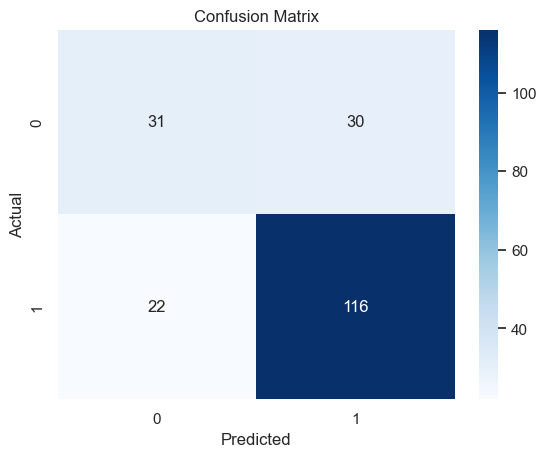

['mango_Regresion_Lineal.pkl']

In [30]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_train_predicted_softReg = model.predict(X_normalized_test)

print('Accuracy', accuracy_score(y_test_validation, y_train_predicted_softReg))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_validation, y_train_predicted_softReg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Guardamos el modelo
joblib.dump(model, "mango_Regresion_Lineal.pkl")



### Matriz de Confusión

La matriz de confusión obtenida para los datos de prueba es la siguiente:

|                | Clase Predicha: 0 | Clase Predicha: 1 |
|----------------|-------------------|-------------------|
| **Clase Real: 0** | 31                | 30                |
| **Clase Real: 1** | 22                | 116               |

#### Interpretación:
- **Verdaderos Positivos (Clase 1 correctamente predicha)**: 116
- **Verdaderos Negativos (Clase 0 correctamente predicha)**: 31
- **Falsos Positivos (Clase 0 predicha como 1)**: 22
- **Falsos Negativos (Clase 1 predicha como 0)**: 30

La matriz refleja que el modelo tiene una **predisposición hacia la clase `1`**, lo que se evidencia en la cantidad de falsos positivos y verdaderos positivos.

### Precisión (Accuracy)

- **Accuracy**: 73.87%

### Conclusión

El modelo sigue mostrando un sesgo hacia la clase `1`, lo cual es consistente con los resultados obtenidos en secciones previas. Este comportamiento podría deberse al **Desbalanceo en las Clases**.


### Próximos Pasos
Para mitigar este sesgo, utilizaremos una tecnica de balanceo como **SMOTE**.


# 12. Entrenamiento con Datos Generados (SMOTE)

Para abordar el desbalanceo de clases en los datos, utilizamos **SMOTE (Synthetic Minority Over-sampling Technique)**. Esta técnica genera datos sintéticos para la clase minoritaria, ayudando al modelo a aprender de manera más equilibrada.



In [31]:
#Ahora vamos a entrenar nuestro modelo de forma diferente, generando datos de la clase en la cual tenemos menos datos
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_normalized, y)


# Paso 2: Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Paso 3: Crear y entrenar el modelo de regresión lineal
model_SMOTE = LogisticRegression(max_iter=1000)
model_SMOTE.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Implementación de SMOTE

1. **Generación de Nuevos Datos:**
   - Aplicamos SMOTE a los datos normalizados (`X_normalized` y `y`), generando una nueva versión balanceada del conjunto de datos (`X_resampled` y `y_resampled`).

2. **División del Conjunto Balanceado:**
   - Dividimos el conjunto balanceado en entrenamiento y prueba, utilizando un 80% para entrenamiento y un 20% para prueba.

3. **Entrenamiento del Modelo:**
   - Entrenamos un modelo de **regresión logística** con los datos balanceados generados por SMOTE.

# 13. Evaluación del Modelo Entrenado con SMOTE

Después de entrenar el modelo con el conjunto balanceado utilizando SMOTE, evaluamos su desempeño con el conjunto de datos de prueba original. Este análisis nos permite verificar si el modelo mejoró en la clasificación de las clases minoritarias.



 Matriz de confusion para los datos de entrenamiento:
[[ 40  21]
 [ 28 110]]
Accuracy 0.7537688442211056


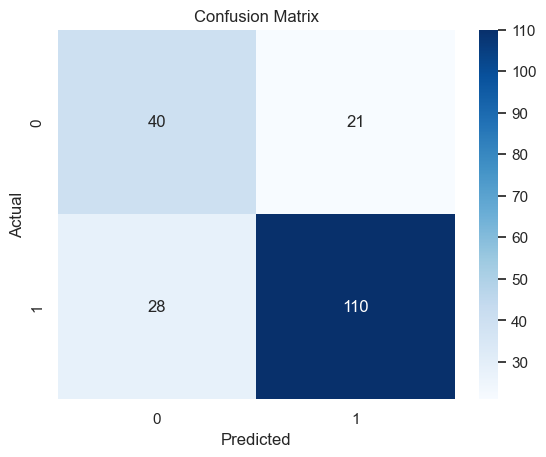

['mango_Regresion_Lineal_Smote.pkl']

In [33]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_train_predicted_softReg_SMOTE = model_SMOTE.predict(X_normalized_test)

print('Accuracy', accuracy_score(y_test_validation, y_train_predicted_softReg_SMOTE))


# Matriz de confusión
conf_matrix = confusion_matrix(y_test_validation, y_train_predicted_softReg_SMOTE)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Guardamos el modelo
joblib.dump(model, "mango_Regresion_Lineal_Smote.pkl")

### Resultados

1. **Matriz de Confusión:**
   - La matriz de confusión muestra cómo el modelo clasifica correctamente (diagonal principal) y los errores de predicción.
   - Resultados:

|                | Clase Predicha: 0 | Clase Predicha: 1 |
|----------------|-------------------|-------------------|
| **Clase Real: 0** | 40                | 21                |
| **Clase Real: 1** | 28                | 110               |

2. **Accuracy (Precisión):**
   - Precisión general del modelo: 75.37%
   - Esto representa una mejora respecto al modelo inicial entrenado sin SMOTE (73.86%).

### Interpretación de los Resultados

- **Mejora en la Clase 0 (Mangos Buenos):**
  - La cantidad de mangos buenos correctamente identificados aumentó de 31 a 40. Esto indica que el modelo entrenado con SMOTE tiene mejor capacidad para identificar la clase minoritaria.

- **Clase 1 (Mangos Podridos):**
  - Aunque sigue siendo la clase con mayor cantidad de datos, el modelo mantiene un buen desempeño en su identificación.

### Conclusión
El uso de SMOTE mejoró significativamente el balance del modelo entre ambas clases. Ahora, el modelo muestra menos predisposición hacia la clase mayoritaria (clase 1) y es más capaz de identificar correctamente los mangos buenos.


# 14. Optimización de Hiperparámetros

Para mejorar aún más el rendimiento del modelo, realizamos una búsqueda en cuadrícula (*Grid Search*) con el fin de encontrar los valores óptimos para los hiperparámetros de la regresión logística.



In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [ 1,10,100], 'max_iter': [3000,4000], 'tol': [1e-04,1e-06], 'class_weight':['balanced']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=2)
grid_search.fit(X_train, y_train)
print("Mejor valor:", grid_search.best_params_)

C:\Users\famil\OneDrive\Escritorio\Tarea de ia\Identificador de mangos\Algoritmo\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejor valor: {'C': 100, 'class_weight': 'balanced', 'max_iter': 3000, 'tol': 1e-06}


### Hiperparámetros Evaluados

Se exploraron los siguientes parámetros y valores:

- **`C`**: Coeficiente de regularización, valores evaluados: `[1, 10, 100]`.
- **`max_iter`**: Número máximo de iteraciones para la optimización, valores evaluados: `[3000,4000]`.
- **`class_weight`**: Si el modelo debe considerar un balance de clases automático o no: `['balanced']`.
- **`tol`**: Tolerancia para el criterio de convergencia, valores evaluados: `[1e-04, 1e-06]`.

### Configuración

Usamos `GridSearchCV` de `sklearn` con validación cruzada de 2 divisiones (*cv=2*) para buscar las combinaciones de hiperparámetros que maximizan el rendimiento del modelo.

In [34]:
#ahora utilizamos los parametros que nos dio
model_PARAMETER = LogisticRegression(max_iter=3000,C=100,tol=1e-06,class_weight='balanced')
model_PARAMETER.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced', max_iter=3000, tol=1e-06)

# 15. Evaluación de Modelo con Parámetros Óptimos
- Después de realizar la optimización de hiperparámetros con GridSearchCV, evaluamos el modelo utilizando los mejores parámetros encontrados. Los resultados son los siguientes:



 Matriz de confusion para los datos de entrenamiento:
[[ 41  20]
 [ 29 109]]
Accuracy 0.7537688442211056


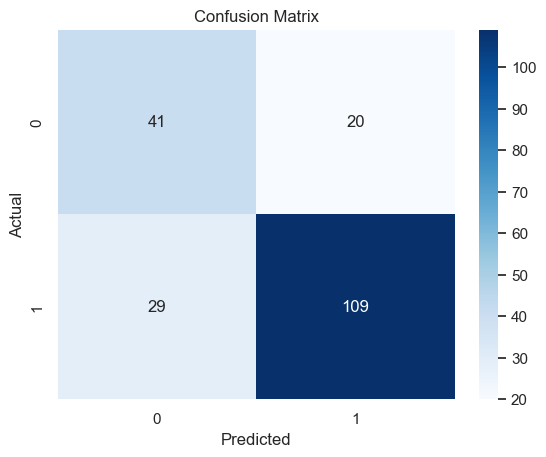

['mango_Regresion_Lineal_Smote_gridSearch.pkl']

In [35]:
#Ahora vemos los resultados
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_train_predicted_softReg_PARAMETER = model_PARAMETER.predict(X_normalized_test)

print(" Matriz de confusion para los datos de entrenamiento:\n%s" % metrics.confusion_matrix(y_test_validation, y_train_predicted_softReg_PARAMETER))
print('Accuracy', accuracy_score(y_test_validation, y_train_predicted_softReg_PARAMETER))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_validation, y_train_predicted_softReg_PARAMETER)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Guardamos el modelo
joblib.dump(model, "mango_Regresion_Lineal_Smote_gridSearch.pkl")

### Resultados del Modelo
 - Matriz de Confusión:
   
|                | Clase Predicha: 0 | Clase Predicha: 1 |
|----------------|-------------------|-------------------|
| **Clase Real: 0** | 41                | 20                |
| **Clase Real: 1** | 29                | 109               |

 - Exactitud (Accuracy): 75.37%
### Observaciones
- Comparando con la versión anterior del modelo (utilizando SMOTE), donde la exactitud era del 75.37%, el ajuste de hiperparámetros no produjo una mejora.
- Se pude ver como los resultados son my parecidos a los que habiamos tenido antes.
### Conclusión
- La optimización de hiperparámetros no siempre garantiza una mejora notable. En este caso, probablemente la naturaleza del dataset y las características ya procesadas están limitando el rendimiento del modelo. podrían probarse:

- Modelos más complejos, como árboles de decisión o redes neuronales.
Selección de características más avanzada, datos adicionales o mejora de la segmentación inicial para proporcionar mayor variedad al modelo.

# Conclusión


- Resultado 1 (max_iter=1000)

|                | Clase Predicha: 0 | Clase Predicha: 1 |
|----------------|-------------------|-------------------|
| **Clase Real: 0** | 31                | 30                |
| **Clase Real: 1** | 22                | 116               |

Precision: 73.87%

- Resultado 2 (max_iter=1000 y SMOTE)

|                | Clase Predicha: 0 | Clase Predicha: 1 |
|----------------|-------------------|-------------------|
| **Clase Real: 0** | 40                | 21                |
| **Clase Real: 1** | 28                | 110               |

Precision: 75.37%

- Resultado 3 (gridSearch y SMOTE)
  
|                | Clase Predicha: 0 | Clase Predicha: 1 |
|----------------|-------------------|-------------------|
| **Clase Real: 0** | 41                | 20                |
| **Clase Real: 1** | 29                | 109               |

Precision: 75.37%


A pesar de haber implementado técnicas avanzadas como **SMOTE** para balancear el dataset y **GridSearchCV** para optimizar los hiperparámetros del modelo de regresión logística, no se observó una mejora significativa en la precisión del modelo. Esto sugiere que el desbalance del dataset, junto con posibles limitaciones del modelo para capturar la complejidad del problema, puede estar afectando negativamente el rendimiento. Es posible que sea necesario explorar otros enfoques, como modelos más complejos (p. ej., redes neuronales) o técnicas de preprocesamiento adicionales, para abordar estas limitaciones.


#  Árboles de decisión

# Importación de librerias

In [1]:
# Importación de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import joblib

# Cargando datos

In [2]:
# Cargando datos
mangos = pd.read_csv("./outputFinal.csv")
# Información de los datos
mangos.info()
mangos.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Columns: 256 entries, type to Intensity_255
dtypes: int64(256)
memory usage: 3.8 MB


,type,Intensity_1,Intensity_2,Intensity_3,Intensity_4,Intensity_5,Intensity_6,Intensity_7,Intensity_8,Intensity_9,...,Intensity_246,Intensity_247,Intensity_248,Intensity_249,Intensity_250,Intensity_251,Intensity_252,Intensity_253,Intensity_254,Intensity_255
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,...,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,0.752415,472.332486,180.455516,121.517031,98.601423,76.948653,87.699542,85.325369,90.320285,77.070158,...,7.633960,10.345704,9.902389,8.078800,6.292323,7.059481,10.098119,13.328419,6.826131,0.023386
std,0.431719,1971.071051,874.584071,667.067813,589.452608,412.052737,738.451567,750.232962,965.225298,635.666742,...,138.187767,236.694751,210.735170,168.262104,108.040564,141.695190,234.325931,287.478231,182.463991,0.637472
min,0.000000,19.000000,8.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,70.000000,29.000000,21.000000,16.000000,14.500000,13.000000,11.000000,10.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,178.000000,44.000000,33.000000,26.000000,22.000000,20.000000,17.000000,16.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,348.000000,83.000000,56.500000,47.000000,39.000000,34.000000,32.000000,29.500000,29.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,47930.000000,22511.000000,20683.000000,17667.000000,12607.000000,19395.000000,20761.000000,29504.000000,20344.000000,...,5163.000000,9911.000000,8211.000000,6722.000000,3501.000000,5284.000000,9305.000000,9686.000000,7540.000000,22.000000


# visualizar los datos

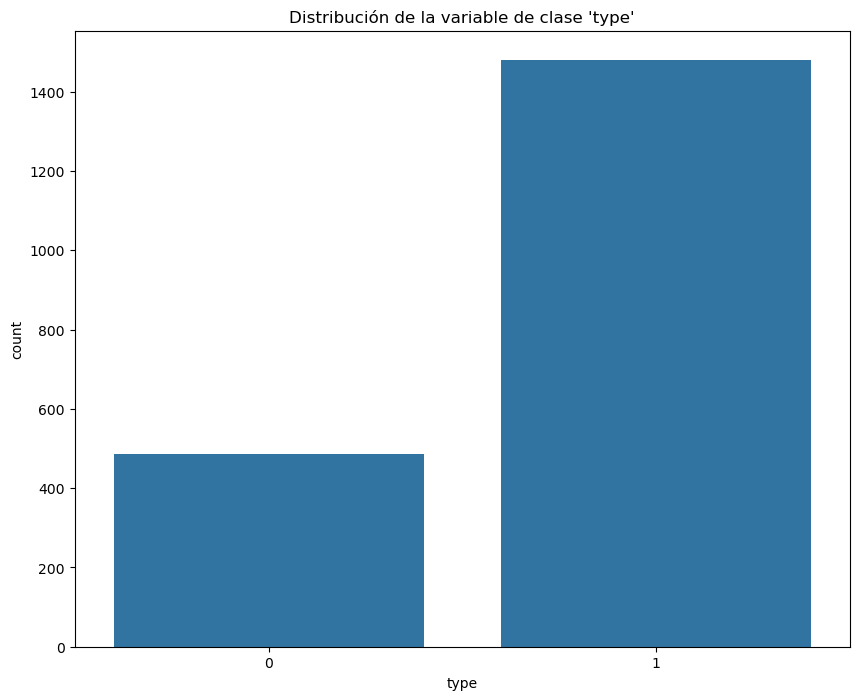

In [3]:
# Visualización de la distribución de la variable de clase
plt.figure(figsize=(10, 8))
sns.countplot(x='type', data=mangos)
plt.title("Distribución de la variable de clase 'type'")
plt.show()

# Valores nulos

In [4]:
# Comprobación de valores nulos
print("Valores nulos por columna:")
mangos.isnull().sum()


Valores nulos por columna:


type             0
Intensity_1      0
Intensity_2      0
Intensity_3      0
Intensity_4      0
                ..
Intensity_251    0
Intensity_252    0
Intensity_253    0
Intensity_254    0
Intensity_255    0
Length: 256, dtype: int64

# Rellenando datos faltantes

In [5]:
# Imputar valores faltantes
imputer = KNNImputer(n_neighbors=5)
x_data_imputado = imputer.fit_transform(mangos.drop(['type'], axis=1))
x_data = pd.DataFrame(x_data_imputado, columns=mangos.drop(['type'], axis=1).columns)

# Escalando caracteristicas

In [6]:
# Escalar características
scaler = MinMaxScaler()
x_data_escalado = scaler.fit_transform(x_data)
x_data = pd.DataFrame(x_data_escalado, columns=x_data.columns)

In [16]:
joblib.dump(imputer, "imputer.pkl")  # Guardar el imputador
joblib.dump(scaler, "scaler.pkl")    # Guardar el escalador

['scaler.pkl']

# Seperar variables

In [7]:
# Separar variables predictoras (X) y objetivo (y)
y_target = mangos['type']

In [8]:
# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.2, random_state=42)

# Balancear datos

In [9]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear los datos de entrenamiento
print("Antes de SMOTE:")
print(y_train.value_counts())  # Ver distribución antes de SMOTE

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Ver distribución después de SMOTE
print("Después de SMOTE:")
print(pd.Series(y_train_balanced).value_counts())  # Ver distribución después de SMOTE


Antes de SMOTE:
type
1    1190
0     383
Name: count, dtype: int64
Después de SMOTE:
type
1    1190
0    1190
Name: count, dtype: int64


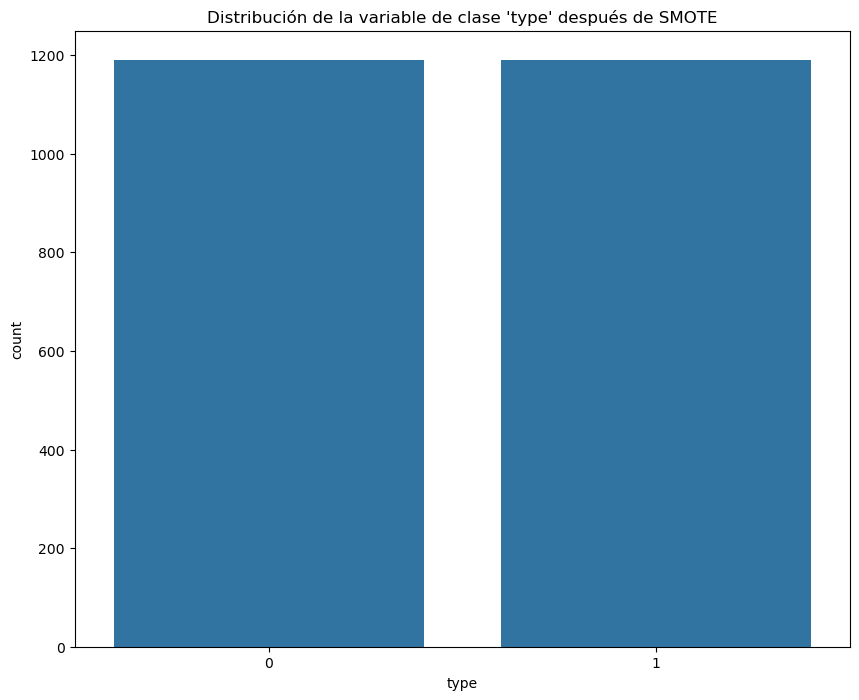

In [10]:
# Visualización de la distribución de la variable de clase después de SMOTE
plt.figure(figsize=(10, 8))
sns.countplot(x=y_train_balanced)
plt.title("Distribución de la variable de clase 'type' después de SMOTE")
plt.show()


# Definiendo parametros a utilizar

In [11]:
# --- 1. GridSearchCV para ajustar parámetros ---
# Definir los parámetros a probar
parametros = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Creando Modelo de árbol de desición

In [12]:
# Crear el modelo de árbol de decisión
modelo = tree.DecisionTreeClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo con los datos balanceados
grid_search.fit(x_train_balanced, y_train_balanced)

# Ver los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros encontrados (GridSearchCV): ", grid_search.best_params_)


Mejores parámetros encontrados (GridSearchCV):  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [13]:
# Usar el mejor modelo encontrado por GridSearchCV
modelo_mejorado_grid = grid_search.best_estimator_

# Predicciones y evaluación para el modelo de GridSearchCV
y_pred_grid = modelo_mejorado_grid.predict(x_test)
print("Matriz de Confusión (GridSearchCV):")
print(confusion_matrix(y_test, y_pred_grid))

print("\nReporte de Clasificación (GridSearchCV):")
print(classification_report(y_test, y_pred_grid))


Matriz de Confusión (GridSearchCV):
[[ 88  16]
 [ 14 276]]

Reporte de Clasificación (GridSearchCV):
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       104
           1       0.95      0.95      0.95       290

    accuracy                           0.92       394
   macro avg       0.90      0.90      0.90       394
weighted avg       0.92      0.92      0.92       394



# Matriz de confusión

In [14]:
nombre_archivo = "modelo_arbol_decision_smote.pkl"
joblib.dump(modelo_mejorado_grid, nombre_archivo)
print(f"Modelo guardado como {nombre_archivo}")

Modelo guardado como modelo_arbol_decision_smote.pkl


# Analisis de los resultados

# Desempeño por Clase:

# Clase 0 (Minoritaria):
Precisión: 86% de las predicciones de clase 0 son correctas.
Recall: El modelo identifica correctamente el 85% de los ejemplos reales de clase 0.
F1-score: 85%, lo que refleja un buen equilibrio entre precisión y recall.

# Clase 1 (Mayoritaria):
Precisión: 95% de las predicciones de clase 1 son correctas.
Recall: El modelo detecta el 95% de los casos reales de clase 1.
F1-score: 95%, lo que indica un rendimiento muy alto para esta clase.
Matriz de Confusión:


# Obeservaciones

El modelo predijo correctamente:
88 de las 104 instancias de clase 0.
276 de las 290 instancias de clase 1.
Los errores se distribuyen así:
16 instancias reales de clase 0 fueron clasificadas como clase 1.
14 instancias reales de clase 1 fueron clasificadas como clase 0.
Estos valores reflejan un balance razonable en el manejo de ambas clases.
Promedios:

Macro promedio (90%): Mide el desempeño promedio entre clases sin considerar el desbalance. Indica que ambas clases son tratadas de forma justa.
Promedio ponderado (92%): Toma en cuenta el tamaño de cada clase, reafirmando que el modelo maneja bien el conjunto en general.

# Conclusiones de los experimentos 


El modelo tiene un excelente desempeño, con alta precisión y recall, particularmente en la clase mayoritaria. Aunque la clase minoritaria (0) muestra un desempeño ligeramente inferior, sigue siendo aceptable con un F1-score del 85%. Esto sugiere que el modelo puede generalizar bien y realizar predicciones confiables incluso en datos desbalanceados iniciales.
La combinación de SMOTE y optimización de hiperparámetros resultó efectiva para abordar el problema del desbalance de clases, logrando un modelo equilibrado y robusto.

concluyendo el modelo es altamente efectivo, especialmente para la clase mayoritaria (1), con un rendimiento algo menor pero aún sólido en la clase minoritaria (0). Esto indica que el modelo es adecuado para tareas donde ambas clases tienen importancia. Sin embargo, el mayor error relativo en la clase 0 podría ser un área a mejorar si esta clase tiene un peso crítico en la aplicación final.

En general, el modelo cumple con los objetivos y está listo para aplicaciones prácticas en las que se requiera una clasificación confiable y equilibrada.

# Clasificación de Mangos Ripe y Rotten usando random forest

 La siguiente es una implementación del modelo random forest para predecir un tipo de mango en un conjunto de datos

> **Trabajo desarrollado por Brayan duran, Daniel Bocachica y andres idarraga**

Este proyecto utiliza un modelo de Random Forest para clasificar mangos en dos categorías: **ripe** (maduros) y **rotten** (podridos).

## Flujo del Trabajo:
1. Cargar y explorar los datos.
2. Preparar los datos para el entrenamiento.
3. Entrenar un modelo de Random Forest.
4. Evaluar el modelo.
5. Guardar el modelo entrenado.

Primero Cargamos las librerias

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

## Cargar y Explorar los Datos

En esta sección, se cargan los datos desde los archivos CSV, se combinan, y se realiza un análisis inicial de las dimensiones, columnas, valores nulos, y estadísticas descriptivas.

* 1 Primero accedemos a los archivos csv para poder leerlos y usarlos, debido a que contienen en si las imagenes que analizaremos
* 2 Combinamos los datos para operar en una sola accion al analizar los datos y trabajar de una forma mas general
* 3 Imprimimos las columnas y las filas que conforman los datos en nuestros archivos para asegurarnos de la correcta lectura de todos los datos
* 4 Verificamos que no existan valores nulos con la intencion de limpiar la informacion y no analizar datos basura
* 5 Usamos una funcion para obtener los datos estadisticos de nuestra poblacion de estudio entre los cuales obtenemos un resumen estadístico de las columnas numéricas del DataFrame, incluyendo el número de valores no nulos, el promedio, la desviación estándar, y los valores extremo.


In [4]:

# 1 Cargar los datos ripe y rotten
ripe_data = pd.read_csv("./outputRipe.csv")
rotten_data = pd.read_csv("./outputRotten.csv")

# 2 Combinar ambos conjuntos de datos
data = pd.concat([ripe_data, rotten_data], ignore_index=True)

# 3 Revisar el tamaño y columnas
print(f"Dimensiones: {data.shape[0]} filas, {data.shape[1]} columnas")
print(data.shape)
print(data.info())

# 4 Verificar valores nulos
print(data.isnull().sum())

# 5 Estadísticas descriptivas
print("Data")
print(data.describe())


Dimensiones: 1967 filas, 257 columnas
(1967, 257)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Columns: 257 entries, filename to Intensity_255
dtypes: int64(256), object(1)
memory usage: 3.9+ MB
None
filename         0
type             0
Intensity_1      0
Intensity_2      0
Intensity_3      0
                ..
Intensity_251    0
Intensity_252    0
Intensity_253    0
Intensity_254    0
Intensity_255    0
Length: 257, dtype: int64
Data
              type   Intensity_1   Intensity_2   Intensity_3   Intensity_4  \
count  1967.000000   1967.000000   1967.000000   1967.000000   1967.000000   
mean      0.752415    472.332486    180.455516    121.517031     98.601423   
std       0.431719   1971.071051    874.584071    667.067813    589.452608   
min       0.000000     19.000000      8.000000      3.000000      3.000000   
25%       1.000000     70.000000     29.000000     21.000000     16.000000   
50%       1.000000    178.000000     44.000000     33.000000   

### Conclusiones de los resultados relevantes


+ Dimensiones del conjunto de datos:

El dataset tiene 1967 filas y 257 columnas, lo cual nos indica que estamos haciendo una lectura completa de los datos, cosa que es importante para el correcto flujo del programa, ya que si no leemos los datos en su totalidad podriamos llegar a afectar el rendimiento del modelo entrenado debido a que pocas muestras significan una mala generalización 

+ Uso de la memoria
Notamos que ocupa 3.9 MB en memoria dato que nos indica el espacio que ocuparian los datos en su totalidad en nuestro equipo a la hora de ser usado, información que nos será util a la hora de entender que tanto tardara el algoritmo en procesar los datos, debido a que a mayor cantidad de datos hay un mayor gasto de recursos

+ Datos generales de las intensidades:

Las intensidades tienen un rango amplio: los valores mínimos comienzan en 2 o 0 y los máximos llegan hasta 47930 en algunas columnas.
Las columnas presentan distribuciones un poco sesgadas, ya que las medianas son significativamente menores que los valores máximos, esto debido a que algunas imagenes en su mayoria tienen un fondo amplio por lo que toma todo el fondo como una sola intensidad.

#### Estadísticas destacadas:

* Media:

La intensidad promedio en las primeras columnas es alta (e.g., Intensity_1: 472.33) y las intensidades disminuyen progresivamente en las últimas columnas (Intensity_255 tiene una media de 0.023) debido al orden en el que se procesan las imagenes, hecho que realmente no afecta al flujo o el proposito de nuestro programa

* Desviación estándar (dispersión):

Variabilidad alta en las primeras intensidades y variaciones altas, esto provocado por la lectura de imagenes con objetos (mangos) con diferentes posiciones en una lectura que captura el fondo, y en donde ademas el tamaño de cada objeto es variable

* Datos en cero:

Desde la columna Intensity_246 en adelante, la mediana y percentiles indican una gran proporción de valores 0, lo cual indica la lectura del fondo de cada imagen dentro de la identidad de los objetos, en donde en muchos casos hace prevalecer esta intensidad por los fondos amplios predominantes 


## Preparar los Datos

Se realizan las siguientes tareas:
1. Convertir la columna `type` a valores categóricos si es necesario.
2. Separar las variables predictoras (`X`) y la variable objetivo (`y`).
3. Dividir los datos en conjuntos de entrenamiento y prueba.
4. Normalizar las variables predictoras.

In [6]:

# Convertir 'type' a categórico si es necesario
data['type'] = data['type'].astype(int)


# Separar variables predictoras e independiente
X = data.drop(columns=['filename', 'type'])
y = data['type']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizamos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Entrenar el Modelo

En esta sección, se entrena un modelo de Random Forest utilizando los datos de entrenamiento.


In [8]:

#clasificamos con random forest

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)


# Evaluacion del modelo

En esta sección, evaluamos el desempeño del modelo de clasificación entrenado utilizando métricas de precisión y una matriz de confusión para interpretar los resultados.

* 1. Calculamos la precisión del modelo (accuracy): Esta métrica indica el porcentaje de predicciones correctas realizadas por el modelo en el conjunto  de prueba.
* 2. Generamos un reporte de clasificación: Este reporte incluye métricas como precisión, recall y F1-score para cada clase, proporcionando un análisis más detallado del rendimiento por categoría.
* 3. Calculamos e imprimimos la matriz de confusión: Este gráfico muestra cómo se distribuyen las predicciones del modelo entre las clases reales y las predichas, permitiendo identificar patrones de error o clases que el modelo clasifica incorrectamente con mayor frecuencia.
* 4. Visualizamos la matriz de confusión como un heatmap: Usamos Seaborn para crear una representación visual que facilita la interpretación de las categorías donde el modelo tuvo buen o mal desempeño.

Accuracy: 0.9441624365482234

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       150
           1       0.94      0.99      0.96       441

    accuracy                           0.94       591
   macro avg       0.95      0.90      0.92       591
weighted avg       0.95      0.94      0.94       591



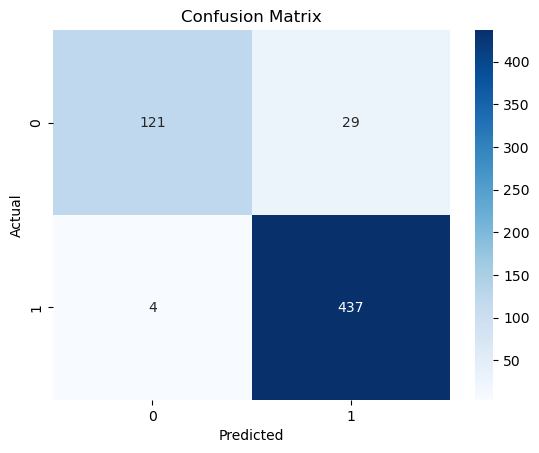

In [10]:
# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Conclusiones de los resultados del entrenamiento

Precisión general del modelo:

El modelo tiene una precisión global (accuracy) de 94.42%, lo que indica que clasifica correctamente la mayoría de las instancias de prueba, cosa que nos indica un ajuste no tan cercano ni tan lejano a 1, sin embargo si tuvieramos que dar una conclusión podriamos decir que esta un poco sobreajustado

#### Análisis por clases:

+ Clase 0:

Precisión: 97% - De todas las instancias clasificadas como clase 0, el 97% son correctas, lo que nos indica una alta precision en la prediccion de los datos y un sobreajuste que nos puede llevar a una exclusion de algunos datos en el futuro, teniendo en cuenta pruebas realizadas con conjuntos de datos de validación

Recall: 81% - El modelo identificó correctamente el 81% de las instancias reales de la clase 0, porcentaje que nos indica que la mayoria de los datos que poseiamos en la clase 0 y subconjunto de pruebas dentro del entrenamiento fur identificada correctamente dentro de su clase


F1-Score: 88% - Buen balance entre precisión y recall, aunque ligeramente más bajo debido a un pequeño desbalance en el resultado de la interpretacion del conjunto de datos

Clase 1:

Precisión: 94% - El 94% de las predicciones para clase 1 son correctas, lo cual nos indica que el nivel de predicción esta un poco sobre ajustado pero no lo suficiente para dictaminar que ignorara datos que hacen parte de la clase si se pone a prueba en un conjunto de validacion

Recall: 99% - Excelente capacidad para identificar casi todas las instancias reales de clase 1, indicandonos que de todos los datos la mayoria han sido identificados de manera exitosa, y considerando el rendimiento del total de predicciones en esta clase podemos considerar que hay un pequeño sobre ajuste

F1-Score: 96% - Excelente balance entre precisión y recall.

#### Promedios (macro y ponderado):

Macro promedio:

Proporciona un promedio simple para precisión, recall y F1-score, con valores de 95%, 90% y 92%, respectivamente.
Indica que, aunque el modelo funciona bien en general, el rendimiento en la clase 0 es ligeramente inferior, debido seguramente a que contamos con menos datos en esta clase, lo que provoca que el rendimiento se vea demasiado cerrado a ciertas caracteristicas especificas en pocos datos.

Promedio ponderado:
Considera el desequilibrio en el soporte (150 para clase 0 y 441 para clase 1).
Valores altos (95%, 94%, y 94%) indican que el modelo está optimizado para ambas clases, con un buen rendimiento general.


### Implicaciones de la matriz de confusión :

El gráfico de matriz de confusión muestra el desglose detallado de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

+ Clase 0:

Se encuentran 29 casos que se han sido arrojados por el predictor de manera erronea, lo que explica el menor recall para esta clase, teniendo en cuenta el desbalance de las muestras entregadas para entrenar el modelo de este conjunto de datos o clase especifica

+ Clase 1:
  
Menos falsos negativos, lo que refleja su alto recall, o sea encoontramos que el ajuste del predictor es bastante especifico, falla en pocos ejemplos


# Usamos la libreria RandomizedSearch
 Variamos hiperparametros y hallamos el resultado mas eficiente


+ ¿Para que usamos la libreria randomized search?

Teniendo en cuenta que para entrenar un modelo usamos parametros especificos que por si solos controlan en la mayoria de los casos una gran parte del rendimiento predictivo que se obtendra al final del proceso, usamos RandomizedSearch para probar diferentes variaciones parametros hasta encontrar la combinación que nos arroje el mejor rendimiento que podriamos sacar de nuestro modelo predictivo

 + Primero llamamos las librerias


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Variacion de parametros
Exploramos parametros con el objetivo de encontrar diferentes combinaciones de estas configuraciones para optimizar el rendimiento del modelo sin comprometer su capacidad de generalización ni eficiencia computacional.

En los parametros que usamos estan:
* El número de árboles en el bosque, con valores aleatorios entre 50 y 199 para equilibrar precisión y eficiencia
* max_depth, que especifica la profundidad máxima de los árboles permitiendo sin límite o valores fijos como 10, 20 y 30, para evitar sobreajuste o ajustar la complejidad del modelo
* min_samples_split, que determina el número mínimo de muestras requeridas para dividir un nodo, variando entre 2 y 10, lo que afecta la estructura de los árboles y el balance entre especialización y generalización.

In [16]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11)
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, verbose=2)

Realizamos la busqueda y hallamos la mejor combinacion de parametros

In [18]:
# Realizar la búsqueda
random_search.fit(X_train, y_train)

# Ver el mejor conjunto de parámetros y su desempeño
print("Mejores parámetros:", random_search.best_params_)
print("Mejor precisión:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=20, min_samples_split=5, n_estimators=142; total time=   1.7s
[CV] END max_depth=20, min_samples_split=5, n_estimators=142; total time=   1.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=142; total time=   1.7s
[CV] END max_depth=20, min_samples_split=5, n_estimators=142; total time=   1.7s
[CV] END max_depth=20, min_samples_split=5, n_estimators=142; total time=   1.6s
[CV] END .max_depth=20, min_samples_split=9, n_estimators=70; total time=   0.7s
[CV] END .max_depth=20, min_samples_split=9, n_estimators=70; total time=   0.7s
[CV] END .max_depth=20, min_samples_split=9, n_estimators=70; total time=   0.7s
[CV] END .max_depth=20, min_samples_split=9, n_estimators=70; total time=   0.9s
[CV] END .max_depth=20, min_samples_split=9, n_estimators=70; total time=   0.7s
[CV] END max_depth=20, min_samples_split=4, n_estimators=124; total time=   1.5s
[CV] END max_depth=20, min_samples_split=4, n_e


### Conclusiones obtenidas de los parametros arrojados

En lo que respecta al desempeño, los hallazgos nos muestran que los parámetros como por ejemplo una profundidad de 20 o 30, unidos a divisiones mínimas de 4 a 9 muestras y estimadores que oscilan entre 100 a 180, presentaron tiempos razonables y que nos indican un buen rendimiento en la ejecucion entre las particiones. Esto indica que las configuraciones de hiperparámetros se encuentran adecuadamente configuradas para balancear la exactitud del modelo con el costo de computación.

Las combinaciones más investigadas comprenden modificaciones en la máxima profundidad del árbol, la cantidad mínima de muestras requeridas para dividir un nodo, y la cantidad de estimadores. Los tiempos de ejecución fluctúan en función de la complejidad de los parámetros, siendo más extensos para modelos con más estimadores o una limitación en la profundidad reducida, lo que indica que las configuraciones más complejas conllevaron un gasto computacional más elevado.

Teniendo en cuenta el desarrollo y puesta en marcha de esta busqueda de hiperparametros, noto que no contuvo un costo computacional tan elevado como otroa ya experimentados enteriormente en este trabajo de investigación

# Usamos los datos de validacion
+ Primero cargamos los datos de validacion y hacemos la normalizacion de los datos


In [20]:
clf = RandomForestClassifier(n_estimators=180, random_state=42, max_depth=20, min_samples_split=3)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9441624365482234
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       150
           1       0.94      0.99      0.96       441

    accuracy                           0.94       591
   macro avg       0.96      0.90      0.92       591
weighted avg       0.95      0.94      0.94       591




### Analisis del entrenamiento del modelo con los nuevos parametros

+ Encontramos que se muestra un desempeño general sólido con los nuevos datos insertados. El modelo alcanzó una precisión del 94.4%, lo que indica que clasifica correctamente la mayoría de las muestras. Además, el puntaje F1 ponderado (0.94) confirma un equilibrio adecuado entre precisión y exhaustividad para las diferentes clases.

Sin embargo, al analizar los resultados por clase, se observa que la clase 0 tiene una precisión más alta (0.98), pero un recall más bajo (0.80), lo que sugiere que el modelo tiende a subestimar las muestras de esta clase. Por otro lado, la clase 1 muestra un excelente recall (0.99) y precisión (0.94), indicando que es más confiable en la identificación de esta clase.

#### Observaciones

* Se estimó al inicio de la realización del taller que lo mas probable era que hubiera un desajuste en los resultados predictivos relacionados a la clase 0, teniendo en cuenta los pocos datos destinados para entrenamiento que fueron usados en este trabajo
* Lo mas probable es que al momento de hacer pruebas con conjuntos de datos para validacion encontremos resultados un poco dispares con relacion a las predicciones realizadas para los datos de la clase 1 y la clase 0

# Evaluamos el modelo con los nuevos parametros obtenidos usando el randomsearch

+ Observamos detenidamente los resultados del nuevo modelo y notamos que el accuracy a disminuido, lo cual no significa algo negativo especificamente, debido a que el modelo demasiado ajustado puede provocar un reconocimiento demasiado cerrado de los valores que componen la deteccion de los tipos de datos

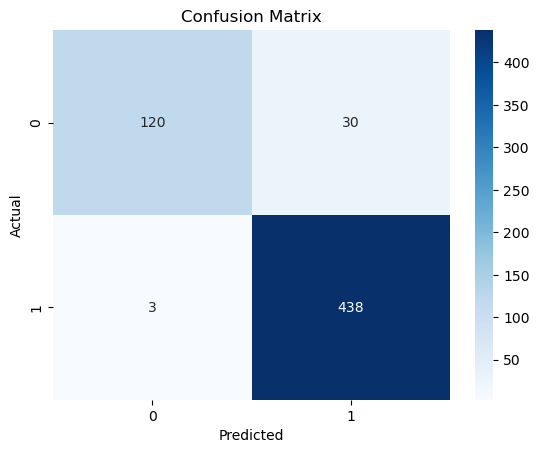

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Analisis de matriz de confusión

 Teniendo en cuenta los resultados obtenidos en ambas pruebas podemos concluir que:
   * Los resultados obtenidos en el primer entrenamiento del modelo se acerca mucho a los resultados obtenidos por el segundo entrenamiento guiado por la busqueda de los mejores parametros
   * El resultado arrojado por el segundo entrenamiento del modelo nos dice una vez mas que el uso de pocos datos para el entrenamiento del modelo para la prediccion de imagenes en la clase 0 se ve claramente afectada, dando como resultado fallas al momento de etiquetar cada una segun su clase
   * Las variaciones en ambas matrices nos dicen que probablemente no han habido cambios en el desempeño del modelo entrenado, pero si tuviesemos que ser estrictos con los resultados de ambas matrices segun su modelo entrenado, diriamos que el segundo entrenamiento sub ajusta el reconocimiento para la clase 0 y sobre ajusta un poco el reconocimiento para la clase 1

* Almacenamos el modelo entrenado

In [37]:
# Guardar el modelo
joblib.dump(clf, "mango_classifier1.pkl")

['mango_classifier1.pkl']

# Cargamos los datos de validacion y hacemos las pruebas correspondientes para sacar las conclusiones finales

+ Cargamos los datos

In [29]:
validation = pd.read_csv("./outputFinalTest.csv")
validation['type'] = validation['type'].astype(int)


X = validation.drop(columns=["type"]).values  # Características
y = validation["type"].values  # Etiquetas

Escalamos los datos para que el proceso de prediccion sea mas eficiente y completo

#### ¿Porque escalamos los datos?

Las razones trascienden varios motivos:

##### Mejora del Rendimiento del Modelo
 
Algunos algoritmos como los basados en arboles generalmente son sensibles a las escalas de datos, por lo que al encontrar valores muy altos en miles o millones, pueden afectar directamente parametros relacionados con el rendimiento del modelo predictivo 

##### Facilita la Convergencia

En algoritmos como el descenso de gradiente, la normalización ayuda a que los cálculos sean más estables y eficientes. Esto reduce el riesgo de que el modelo tenga problemas de convergencia debido a pasos inconsistentes causados por diferentes escalas en las características.

##### Evita Sesgos Indeseados

Si las características no están normalizadas, los algoritmos pueden interpretar incorrectamente las relaciones entre las variables, atribuyendo más importancia a las características con valores mayores, incluso si no son más relevantes para el entrenamiento del modelo predictivo.

Escalamiento:


In [31]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

* Cargamos el modelo para probar los datos de validacion e imprimimos los resultados de precisión

In [33]:
model_path = "mango_classifier1.pkl" 
model = joblib.load(model_path)

predictions = model.predict(X_scaled)

accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Imprimir el classification report
report = classification_report(y, predictions, target_names=['Clase 0', 'Clase 1'])  # Cambia nombres si tienes más clases
print("\nClassification Report:")
print(report)

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

     Clase 0       0.54      0.87      0.67        61
     Clase 1       0.93      0.70      0.80       150

    accuracy                           0.75       211
   macro avg       0.74      0.78      0.73       211
weighted avg       0.82      0.75      0.76       211



### conclusiones finales del desempeño del modelo entrenado en los datos de validación


Los resultados de la predicción en el conjunto de datos de validación indican un desempeño moderado del modelo con un accuracy global de 0.75 (75%). Aquí están las conclusiones clave basadas en el análisis detallado:

1. Desempeño por clase:
   
Para la Clase 0:

Precisión: 0.54, lo que sugiere que el modelo tiene dificultades para predecir correctamente esta clase, y teniendo en cuenta los resultados arrojados en el entrenamiento del modelo esto era de esperarse, considerando que el conjunto de datos usado para entrenar el modelo con la intención de hacer el reconocimiento de los datos de esta clase eran muy limitados, y lo mas probable es que la idea general del modelo para esta clase fuera muy especifica, lo cual dejaría una gran poblacion de muestras en una conjunto de predicciones erroneas.

Recall: 0.87, lo que implica que detecta la mayoría de los casos reales de Clase 0, pero con una precisión comprometida.

Para la Clase 1:

Precisión: 0.93, lo que indica que la mayoría de las predicciones para esta clase son correctas, como contraparte la clase 1 nos indica que los parametros escogidos para el entrenamiento son en su mayoria los correctos, debido a que esta clase contó en su proceso de entrenamiento con 4 o 5 veces mas datos que la primera clase, lo cual en un caso hipotetico donde el modelo y sus parametros estuvieran bien ajustados los resultados serian satisfactorios como mínimo, y asi ha sido

Recall: 0.70, lo que sugiere que no se detectan todos los casos reales de Clase 1, esto problemente debido a que en el conjunto de datos una gran parte de los mangos en la clase rotten no tienen la apariencia de estar podridos en su totalidad lo que pudo haber sesgado los resultados obtenidos para la totalidad del conjunto de datos

3. Promedios generales:
Macro promedio: Muestra un desempeño más balanceado entre las clases, con recall y F1-Score alrededor de 0.73-0.78, lo que resalta el desequilibrio en las predicciones de las clases provocado por la distribucion de la cantidad de datos usados en una y otra clase.

Promedio ponderado: Refleja el impacto mayor de la Clase 1 debido a su mayor soporte (150 instancias), con un accuracy ponderado de 0.76, concluyendo asi que no solo se han usado mas datos para entrenar el modelo sino que han sido usados mas datos para probarlo, de forma que los buenos resultados encontrados en la prediccion de los datos para la clase es precisamente el resultado de un cumulo de factores que influyen al desempeño del modelo

# Identificador de mangos maduros o prodidos por MPLC

# 1. Importación de Librerías Necesarias

En esta sección, importamos las librerías que serán utilizadas en el análisis y construcción de nuestro modelo de clasificación. A continuación, se presenta una breve descripción de cada una:


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
import joblib
from sklearn.metrics import confusion_matrix


- `numpy`: Biblioteca para trabajar con matrices y funciones matemáticas de alto nivel.
- `matplotlib.pyplot`: Herramienta para generar visualizaciones gráficas.
- `os`: Módulo para interactuar con el sistema operativo y manejar archivos.
- `cv2`: Biblioteca de OpenCV para el procesamiento de imágenes.
- `pandas`: Biblioteca para manipulación y análisis de datos estructurados.
- `seaborn`: Herramienta para crear visualizaciones estadísticas atractivas.
- `sklearn.model_selection.train_test_split`: Función para dividir los datos en conjuntos de entrenamiento y prueba.
- `sklearn.preprocessing.MinMaxScaler`: Herramienta para escalar los datos, normalizando las features.
- `sklearn.neural_network.MLPClassifier`: Modelo de Perceptrón multicapa.
- `joblib`:Libreria para guardar los modelos generados

# 2. Creación de Carpetas para Almacenamiento de Imágenes en Escala de Grises

En esta sección, configuramos el entorno para almacenar las imágenes procesadas en escala de grises. Estas carpetas separarán las imágenes según su tipo (maduras o podridas) y su propósito (entrenamiento o prueba).




In [ ]:
carpeta_grises_ripe=os.path.join(r"./Ripe_gray")
carpeta_grises_rotten=os.path.join(r"./Rotten_gray")
carpeta_grises_ripe_test=os.path.join(r"./Ripe_gray_test")
carpeta_grises_rotten_test=os.path.join(r"./Rotten_gray_test")

if not os.path.exists(carpeta_grises_ripe) and not os.path.exists(carpeta_grises_rotten) and not os.path.exists(carpeta_grises_ripe_test) and not os.path.exists(carpeta_grises_rotten_test):
  os.mkdir(carpeta_grises_ripe)
  os.mkdir(carpeta_grises_rotten)
  os.mkdir(carpeta_grises_ripe_test)
  os.mkdir(carpeta_grises_rotten_test)

- `carpeta_grises_ripe`: Almacenará imágenes de mangos maduros en escala de grises para el conjunto de entrenamiento.
- `carpeta_grises_rotten`: Almacenará imágenes de mangos podridos en escala de grises para el conjunto de entrenamiento.
- `carpeta_grises_ripe_test`: Almacenará imágenes de mangos maduros en escala de grises para el conjunto de prueba.
- `carpeta_grises_rotten_test`: Almacenará imágenes de mangos podridos en escala de grises para el conjunto de prueba.

El bloque de código verifica si estas carpetas existen y, si no es así, las crea usando `os.mkdir`.

# 3. Conversión de Imágenes a Escala de Grises

Aquí definimos una función llamada `convertToGray` que convierte imágenes de una carpeta de entrada a escala de grises y las guarda en una carpeta de salida. Este proceso es importante para simplificar el análisis de imágenes y reducir la complejidad de los datos para el modelo de clasificación.




In [2]:
def convertToGray(path_images, path_results):
    # Recorrer todas las imágenes en la carpeta de entrada
    for archivo in os.listdir(path_images):
        # Filtrar solo por imágenes
        if archivo.endswith((".jpg", ".jpeg", ".png")):
            # Abrir imagen
            ruta_imagen = os.path.join(path_images, archivo)
            imagen = cv2.imread(ruta_imagen)

            # Convertir a escala de grises
            imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

            # Guardar imagen en carpeta de salida
            nombre_salida = os.path.join(path_results, f"gris_{archivo}")
            cv2.imwrite(f'{nombre_salida}', imagen_gris)

convertToGray(r"./Ripe",r"./ripe_gray")
convertToGray(r"./Rotten",r"./unripe_gray")

### Descripción de la Función

- **Parámetros de Entrada**:
  - `path_images`: Ruta de la carpeta que contiene las imágenes originales.
  - `path_results`: Ruta de la carpeta donde se guardarán las imágenes convertidas en escala de grises.

- **Pasos del Código**:
  1. Iteramos sobre los archivos de la carpeta de entrada (`path_images`) y seleccionamos solo los archivos de imágenes (`jpg`, `jpeg`, `png`).
  2. Cargamos cada imagen con `cv2.imread` y la convertimos a escala de grises con `cv2.cvtColor`.
  3. Guardamos la imagen en la carpeta de destino (`path_results`) con el prefijo `gris_` para diferenciarlas.


# 4. Visualización de Imágenes en Escala de Grises

En esta sección, definimos la función `SeeImage` para abrir y visualizar una de las imágenes procesadas en escala de grises. Esto nos permite verificar visualmente que las imágenes se hayan guardado correctamente en la carpeta de destino.



In [ ]:
def SeeImage(path_image):
  img = cv2.imread(path_image)
  plt.imshow(img)
  plt.show()

SeeImage("./Ripe_gray/gris_109.jpg")

### Descripción de la Función

- **Parámetro de Entrada**:
  - `path_image`: Ruta de la imagen que se desea visualizar.

- **Pasos del Código**:
  1. La función carga la imagen desde la ruta especificada usando `cv2.imread`.
  2. La visualiza usando `plt.imshow` de Matplotlib, lo cual permite mostrar la imagen en el notebook para inspeccionar la calidad de la conversión.

- **Uso de la Función**: La función se ejecuta a continuación para visualizar una de las imágenes en la carpeta `Ripe_gray`:
  



# 5. Creación del DataFrame a Partir de las Imágenes

En esta sección, definimos la función `makeDataFrame`, que toma las imágenes convertidas en escala de grises y las transforma en un formato tabular. El objetivo es crear un DataFrame que pueda ser utilizado para entrenar el modelo de clasificación de mangos podridos y maduros.




In [2]:
def makeDataFrame(path_images,rotten=0,data=[]):
    for archivo in os.listdir(path_images):
        # Filtrar solo por imágenes
        if archivo.endswith((".jpg", ".jpeg", ".png")):
            # Abrir imagen
            ruta_imagen = os.path.join(path_images, archivo)
            imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

            #Aplanar la imagen para convertirla en una sola fila
            img_flattened = imagen.flatten()
            #eliminamos las imagenes que no sean de 224*224
            if img_flattened.__len__() > 50176:
                continue

            #Añadir los datos de la imagen a la lista y agregamos la columna a predecir
            data.append(list(img_flattened) + [rotten])




    
data = []
makeDataFrame(r"./Ripe_grises",rotten=0,data=data)
makeDataFrame(r"./Rotten_grises",rotten=1,data=data)
df = pd.DataFrame(data)

### Descripción de la Función

- **Parámetros de Entrada**:
  - `path_images`: Ruta de la carpeta con las imágenes en escala de grises.
  - `rotten`: Etiqueta de clase (0 para mangos maduros y 1 para podridos) que se asignará a cada imagen.
  - `data`: Lista donde se almacenarán los datos de las imágenes y sus etiquetas.

- **Pasos del Código**:
  1. Iteramos sobre los archivos de la carpeta de imágenes y filtramos solo aquellos que son formatos de imagen (`jpg`, `jpeg`, `png`).
  2. Cargamos la imagen en escala de grises con `cv2.imread`.
  3. Aplanado de Imágenes: Convertimos cada imagen en una sola fila de píxeles mediante `flatten()` para que cada fila represente una imagen.
  4. Filtramos las imágenes que no tienen un tamaño de `224x224` píxeles, omitiéndolas si su tamaño supera `50176` píxeles.
  5. Agregamos cada fila de datos a la lista `data`, junto con la etiqueta de clase `rotten` (0 o 1).

# 6. Renombrado de Columnas y Optimización de Tipos de Datos

En esta sección, realizamos dos pasos importantes para mejorar la legibilidad y la eficiencia de nuestro DataFrame. Renombramos las columnas de manera que sean descriptivas y transformamos los tipos de datos de las columnas, lo cual ayuda a reducir el uso de memoria.




In [3]:
#ahora renombramos todas las columnas para que sean mas entendibles para nosotros
df.columns = [f"pixel_{i}" for i in range(df.shape[1] - 1)] + ["rotten"]
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
#convertimos todas las columnas que tengan float a uint8 (0-255)
df = df.astype({col: 'uint8' for col in df.select_dtypes(include='float').columns})

### Descripción de las Operaciones

- **Renombrado de Columnas**:
  - Cambiamos los nombres de las columnas de cada píxel en un formato comprensible (`pixel_0`, `pixel_1`, etc.) para representar la posición de cada píxel en la imagen.
  - La última columna se llama `"rotten"` e indica si el mango es maduro (`0`) o podrido (`1`).

- **Limpieza de Valores Inválidos**:
  - Eliminamos filas que contienen valores como `NaN`, `inf` y `-inf`, asegurándonos de que todos los datos sean válidos y consistentes para el análisis.

- **Conversión de Tipos de Datos**:
  - Convertimos todas las columnas que contienen datos en tipo `float` al tipo `uint8` (enteros entre 0 y 255), que es el rango de valores de un píxel en imágenes en escala de grises. Esto optimiza el uso de memoria y facilita la interpretación de los valores de píxeles.

In [4]:
#mostramos nuestro data frame
print("--- DataFrame created ---")
print(df)

--- DataFrame created ---
      pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1802        0        0        0        0        0        0        0        0   
1803        0        0        0        0        0        0        0        0   
1804        0        0        0        0        0        0        0        0   
1805        0        0        0        0        0        0        0        0   
1806        0        0        0        0        0        0        0        0   

      pixel_8

# 7. Eliminación de Variables Cuasi-Constantes

En esta etapa, eliminamos características del DataFrame que tienen baja variabilidad entre las muestras, es decir, aquellas que son constantes o casi constantes. Esto ayuda a reducir la dimensionalidad del dataset y a mejorar la eficiencia del modelo, evitando características que aportan poca información relevante para la clasificación. 


In [5]:
#Eliminamos las varianbles que son constantes en la mayoria de los casos
from sklearn.feature_selection import VarianceThreshold
# Configura el threshold para el filtro de varianza. En este caso, 0.01 
selector = VarianceThreshold(threshold=0.01)
# Aplica el filtro a los datos
df_reduced = selector.fit_transform(df)

# Mostrar el resultado en un DataFrame nuevo
df_reduced = pd.DataFrame(df_reduced, columns=df.columns[selector.get_support()])

print("DataFrame después de eliminar características cuasi-constantes:")
print(df_reduced)

DataFrame después de eliminar características cuasi-constantes:
      pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1798        0        0        0        0        0        0        0        0   
1799        0        0        0        0        0        0        0        0   
1800        0        0        0        0        0        0        0        0   
1801        0        0        0        0        0        0        0        0   
1802        0        0        0        0        0       

### Descripción del Proceso

- **Selección de Características por Varianza**:
  - Usamos `VarianceThreshold` de `sklearn.feature_selection` para filtrar aquellas columnas que tienen una varianza por debajo de un umbral específico. En este caso, configuramos un umbral de `0.01`, lo que significa que las columnas cuya varianza es menor a este valor serán eliminadas.

- **Aplicación del Filtro**:
  - Aplicamos el filtro de varianza a nuestro DataFrame para reducir las dimensiones.
  - Creamos un nuevo DataFrame `df_reduced`, que contiene solo las características que superaron el umbral de varianza.

- **Resultado Final**:
  - Este proceso ayuda a optimizar los datos y reducir la carga computacional del modelo al eliminar características que no contribuyen significativamente al análisis. En este caso nos podemos dar cuenta que no elimina ninguna columna, por lo tanto en nuestros datos todas las columnas aportan informacion.


In [7]:
#vemos informacion sobre como es nuestro data frame
print("--- DataFrame info ---")
df.info()

--- DataFrame info ---
<class 'pandas.core.frame.DataFrame'>
Index: 1803 entries, 0 to 1806
Columns: 50177 entries, pixel_0 to rotten
dtypes: uint64(1), uint8(50176)
memory usage: 86.3 MB


# 8. Análisis del Balance de Clases

En esta sección, analizamos la distribución de las clases en el dataset para identificar posibles desbalances entre las etiquetas. Es importante entender esta distribución porque un desbalance significativo puede afectar el rendimiento del modelo al entrenarlo, inclinándolo a predecir mayormente la clase mayoritaria.



--- DataFrame shape ---


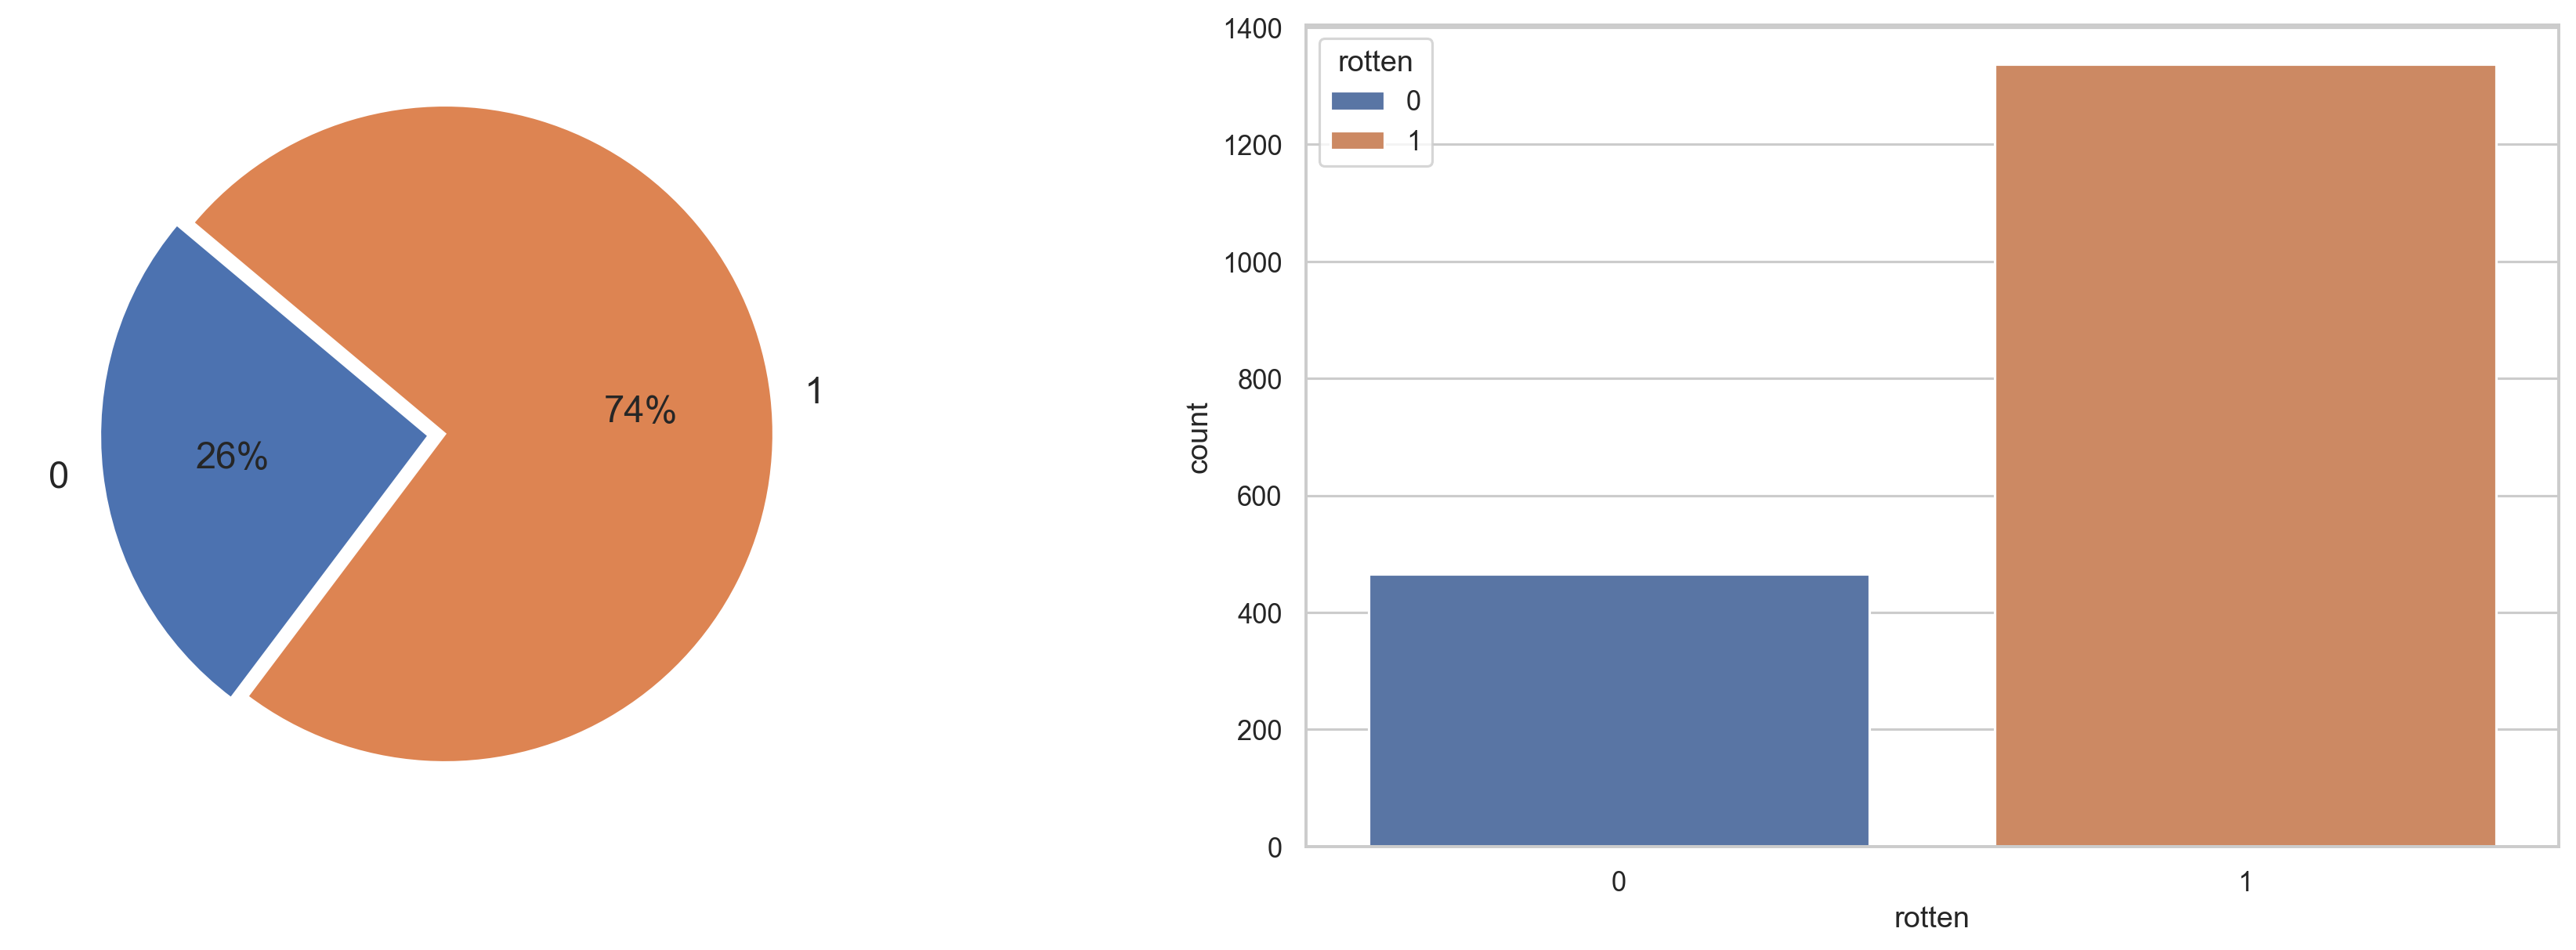

           pixel_0      pixel_1      pixel_2      pixel_3      pixel_4  \
count  1803.000000  1803.000000  1803.000000  1803.000000  1803.000000   
mean      0.084304     0.073211     0.077648     0.085413     0.082640   
std       1.935013     2.095439     2.405267     2.631117     2.539443   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max      74.000000    84.000000    99.000000   108.000000   103.000000   

           pixel_5      pixel_6      pixel_7      pixel_8      pixel_9  ...  \
count  1803.000000  1803.000000  1803.000000  1803.000000  1803.000000  ...   
mean      0.084304     0.089296     0.089850     0.093733     0.107044  ...   
std       2.609552     2.786983     2.744528     2.839702     2.880754  ...   
min       0.00000

In [6]:
#vemos cuantos datos de entrenamiento para cada caso tenemos:
print("--- DataFrame shape ---")
labels = df['rotten'].unique()
dist = (df['rotten'].value_counts()).to_numpy()
dist = dist[::-1]

sns.set(style="whitegrid")

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(dist, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.countplot(df, x="rotten", hue='rotten')

plt.show()
print(df.describe())

### Observación del Balance

- **Distribución de Clases**:
  - Calculamos la cantidad de muestras para cada etiqueta (`rotten`) y visualizamos la proporción de datos usando un gráfico de pastel.
  - Utilizamos un gráfico de barras para complementar el análisis visual y destacar las diferencias en las cantidades de cada clase.

- **Desbalance de Clases**:
  - Notamos que existe un desbalance en los datos: hay más imágenes de mangos podridos (`rotten = 1`) que de mangos buenos (`rotten = 0`).
  - Este desbalance puede influir en el modelo al sesgar sus predicciones hacia la clase mayoritaria.

# 9. Preparación de Datos y Entrenamiento del Modelo

En este paso, preparamos los datos para entrenar nuestro modelo y realizamos el proceso de entrenamiento.




In [40]:
#preparamos los datos para entrenar a nuestro modelo y entrenamos al mismo, en nuestro caso es un modelo MPLC

# Paso 1: Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['rotten'])  # Las características son todas las columnas menos 'rotten'
y = df['rotten']  # La columna 'rotten' es lo que queremos predecir

# Normaliza las características
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


# Paso 2: Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Paso 3: Crear y entrenar el modelo de MPLC
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=1000, momentum=0.9)
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

- **Separación de datos**: Dividimos el dataset en características (`X`) y la variable objetivo (`y`). Esto nos permite separar los datos que usaremos para predecir y la etiqueta que queremos predecir.
- **Normalización**: Aplicamos una escala uniforme a las características para garantizar que todas estén en el mismo rango, mejorando el rendimiento del modelo.
- **División del conjunto de datos**: Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%) para evaluar la precisión del modelo después de entrenarlo.
- **Entrenamiento del modelo**: Creamos y entrenamos un modelo de red neuronal utilizando `MLPClassifier`, configurado con una capa oculta, la función de activación ReLU y el optimizador Adam.

# 10. Evaluación del Modelo

En esta sección, evaluamos el rendimiento del modelo utilizando el conjunto de prueba. Calculamos métricas de rendimiento, observamos las predicciones realizadas y visualizamos la comparación entre valores reales y predichos.




Accuracy: 82.83%
Predicciones totales: 361
Total de predicciones correctas: 299.0


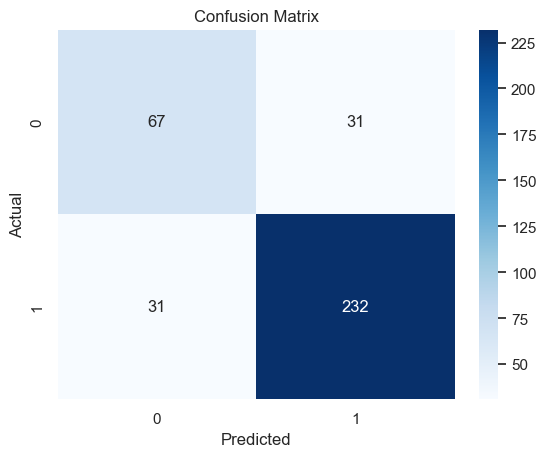

['mango_MPLc.pkl']

In [41]:
#ahora probamos nuestro modelo:
# Paso 4: Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)


# Paso 5: Evaluar el modelo
accuracy = np.mean(y_pred == y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f'Predicciones totales: {len(y_pred)}')
print(f'Total de predicciones correctas: {len(y_pred)*accuracy}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
joblib.dump(model, "mango_MPLc.pkl")




### Predicciones

El modelo realiza predicciones utilizando el conjunto de prueba (`X_test`). Estas predicciones se comparan con los valores reales (`y_test`) para evaluar su precisión.

### Métrica de Evaluación

Calculamos el **Accuracy** como la proporción de predicciones correctas sobre el total de predicciones realizadas. Los resultados obtenidos fueron:
- **Accuracy**: 82.83%
- **Predicciones totales**: 361
- **Total de predicciones correctas**: 299

### Observación del Comportamiento del Modelo

El modelo tiende a predecir más mangos podridos (`rotten = 1`). Esto podría deberse al **desbalance de clases** identificado anteriormente, ya que había más imágenes de mangos podridos en el dataset de entrenamiento.

### Visualización

Para analizar mejor el comportamiento del modelo, se generó un gráfico de conteo que compara los valores reales con las predicciones realizadas
el gráfico muestra las diferencias entre las predicciones del modelo y los valores reales para ambas clases, destacando el sesgo hacia la clase mayoritaria (mangos podridos).


In [37]:
#Pasamos a gris nuestras imagenes de test
convertToGray(r"./FondoMaduroV",r"./Ripe_gray_test")
convertToGray(r"./FondoPodridoV",r"./Rotten_gray_test")

NameError: name 'convertToGray' is not defined

In [13]:
#Creamos nuestro dataset con los datos de prueba
data_test=[]
makeDataFrame(r"./Ripe_gray_test",rotten=0,data=data_test)
makeDataFrame(r"./Rotten_gray_test",rotten=1,data=data_test)
df_test=pd.DataFrame(data_test)

In [14]:
#ahora renombramos todas las columnas para que sean mas entendibles para nosotros
df_test.columns = [f"pixel_{i}" for i in range(df_test.shape[1] - 1)] + ["rotten"]
df_test = df_test[~df_test.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
#convertimos todas las columnas que tengan float a uint8 (0-255)
df_test = df_test.astype({col: 'uint8' for col in df_test.select_dtypes(include='float').columns})

In [14]:
#vemos informacion sobre como es nuestro data frame
print("--- DataFrame info ---")
df_test.info()

--- DataFrame info ---
<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Columns: 50177 entries, pixel_0 to rotten
dtypes: uint64(1), uint8(50176)
memory usage: 9.5 MB


# 11. Preparación de Datos para Validación del Modelo

En esta etapa, preparamos un conjunto de datos independiente para validar el modelo entrenado. Este paso es crucial para evaluar cómo generaliza el modelo a datos nuevos no vistos durante el entrenamiento.


In [43]:
#preparamos los datos para entrenar a nuestro modelo y entrenamos al mismo

# Paso 1: Separar las características (X) y la variable objetivo (y)
X_test_validation = df_test.drop(columns=['rotten'])  # Las características son todas las columnas menos 'rotten'
y_test_validation = df_test['rotten']  # La columna 'rotten' es lo que queremos predecir

# Normaliza las características
X_normalized_test = scaler.fit_transform(X_test_validation)

### Separación de Características y Variable Objetivo

- **Características (`X_test_validation`)**: Todas las columnas del dataset de prueba independiente excepto `rotten`.
- **Variable Objetivo (`y_test_validation`)**: La columna `rotten`, que indica si un mango está podrido (`1`) o no (`0`).

### Normalización de las Características

Para mantener la coherencia con los datos usados durante el entrenamiento, normalizamos las características utilizando el mismo escalador (`scaler`). Esto garantiza que los datos de validación estén en el mismo rango que los datos de entrenamiento.


# 12. Validación del Modelo con Datos Independientes

En esta etapa, evaluamos el modelo utilizando un conjunto de datos independiente para comprobar su capacidad de generalización. Esto implica calcular métricas de rendimiento y analizar su comportamiento en datos no vistos durante el entrenamiento.




Accuracy 0.7788944723618091


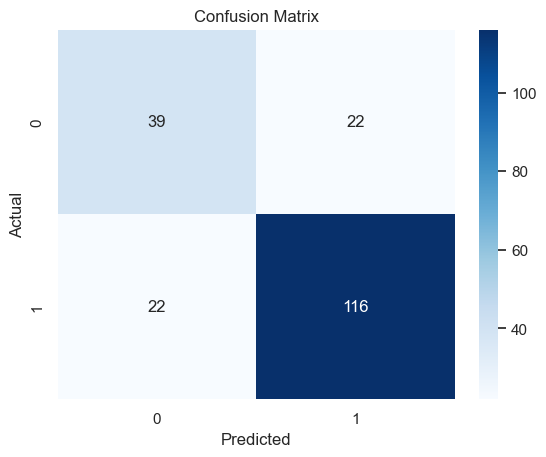

In [46]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_train_predicted_softReg = model.predict(X_normalized_test)

print('Accuracy', accuracy_score(y_test_validation, y_train_predicted_softReg))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_validation, y_train_predicted_softReg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Resultados de la Validación

- **Matriz de Confusión**:
  La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas clasificadas en cada clase. Los resultados obtenidos son:

  |                | Predicción: No Podrido (`0`) | Predicción: Podrido (`1`) |
  |----------------|-------------------------------|----------------------------|
  | **Real: No Podrido (`0`)** | 39                            | 22                         |
  | **Real: Podrido (`1`)**     | 22                            | 116                        |


- **Accuracy**:
  El Accuracy obtenido fue **77.38%**, lo que indica que el modelo clasificó correctamente aproximadamente tres cuartas partes de los datos.

### Observaciones

- El modelo muestra un mejor desempeño al identificar mangos podridos (`1`), lo que podría estar influenciado por el desbalance de clases en los datos de entrenamiento.
- Existe un número significativo de falsos positivos (mangos no podridos clasificados como podridos), lo cual podría impactar en aplicaciones prácticas dependiendo del contexto.


# 13. Reporte de Clasificación

En esta sección, presentamos el **Reporte de Clasificación** para evaluar el rendimiento de nuestro modelo utilizando las métricas de precisión, recall y f1-score. Estas métricas nos permiten obtener una visión más detallada sobre la capacidad del modelo para clasificar correctamente las clases de mangos (Podrido vs. No Podrido).




In [45]:
from sklearn.metrics import classification_report

# Supongamos que tienes y_true y y_pred para tus datos
print(classification_report(y_test_validation, y_train_predicted_softReg, target_names=["No podrido", "Podrido"]))

              precision    recall  f1-score   support

  No podrido       0.64      0.64      0.64        61
     Podrido       0.84      0.84      0.84       138

    accuracy                           0.78       199
   macro avg       0.74      0.74      0.74       199
weighted avg       0.78      0.78      0.78       199



### Resultados del Reporte de Clasificación

- **Precisión**: Es la fracción de las predicciones positivas correctas con respecto al total de predicciones positivas. Para los mangos podridos, la precisión es del 84%, indicando que cuando el modelo predice que un mango está podrido, tiene una alta probabilidad de estar en lo correcto. Sin embargo, para los mangos no podridos, la precisión es del 64%, lo que podría sugerir que el modelo tiene una tasa de falsos positivos más alta para esta clase.
  
- **Recall**: Es la fracción de los verdaderos positivos que fueron correctamente identificados por el modelo. El recall para los mangos no podridos es del 64%, lo que significa que el modelo identifica correctamente el 64% de los mangos no podridos. Para los mangos podridos, el recall es del 84%, indicando que el modelo es bastante bueno para identificar mangos podridos, aunque podría mejorar un poco más para los mangos no podridos.

- **F1-Score**: Es la media armónica de precisión y recall, proporcionando una medida más equilibrada de la capacidad del modelo para clasificar correctamente ambas clases. El F1-score para los mangos podridos es 0.84, lo cual es alto, mientras que para los mangos no podridos es 0.64, lo que indica que hay margen de mejora en esta clase.

### Métricas Globales

- **Exactitud (Accuracy)**: 78%. El modelo tiene una buena tasa de predicción correcta general.
- **Promedio Macro**: El promedio de precisión, recall y F1-score sin tener en cuenta el soporte es 0.74, indicando un desempeño balanceado entre ambas clases.
- **Promedio Ponderado**: El promedio ponderado, que tiene en cuenta el soporte de cada clase, es de 0.78 para precisión, 0.78 para recall y 0.78 para F1-score, reflejando el desempeño general aceptable del modelo.

### Observaciones

- Aunque el modelo tiene un buen rendimiento, el **desbalance en las clases** sigue influyendo en su comportamiento. El modelo muestra una mayor precisión y recall para la clase "Podrido", que es la clase mayoritaria. Sin embargo, el modelo aún tiene margen de mejora para la clase "No Podrido".

Este análisis y las métricas proporcionadas son fundamentales para comprender cómo el modelo maneja las diferentes clases y cuáles áreas pueden necesitar más ajustes o mejoras.


# 14. Entrenamiento del Modelo con SMOTE para Balancear las Clases

En este paso, aplicamos una técnica de sobremuestreo llamada SMOTE (Synthetic Minority Over-sampling Technique) para balancear las clases en el conjunto de datos. Esto ayuda a mejorar el rendimiento del modelo al generar muestras sintéticas de la clase minoritaria, que en este caso es la clase de mangos no podridos.





Iteration 1, loss = 2.83066204
Iteration 2, loss = 1.14971917
Iteration 3, loss = 0.72517112
Iteration 4, loss = 0.55182844
Iteration 5, loss = 0.50016623
Iteration 6, loss = 0.46967059
Iteration 7, loss = 0.44671351
Iteration 8, loss = 0.43277157
Iteration 9, loss = 0.42876340
Iteration 10, loss = 0.41803334
Iteration 11, loss = 0.40996438
Iteration 12, loss = 0.44706602
Iteration 13, loss = 0.40628544
Iteration 14, loss = 0.39372195
Iteration 15, loss = 0.35788786
Iteration 16, loss = 0.33806789
Iteration 17, loss = 0.32931853
Iteration 18, loss = 0.32054385
Iteration 19, loss = 0.30433766
Iteration 20, loss = 0.29674537
Iteration 21, loss = 0.28800892
Iteration 22, loss = 0.28814297
Iteration 23, loss = 0.30368018
Iteration 24, loss = 0.28291773
Iteration 25, loss = 0.26730334
Iteration 26, loss = 0.24955599
Iteration 27, loss = 0.23912614
Iteration 28, loss = 0.24090854
Iteration 29, loss = 0.22842178
Iteration 30, loss = 0.23651674
Iteration 31, loss = 0.26219060
Iteration 32, los

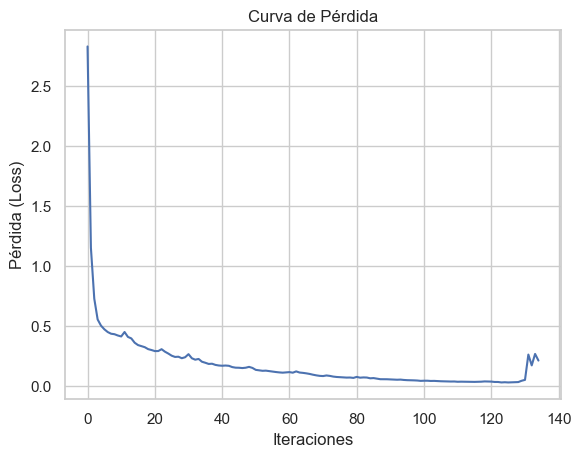

In [22]:
#Ahora vamos a entrenar nuestro modelo de forma diferente, generando datos de la clase en la cual tenemos menos datos
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_normalized, y)


# Paso 2: Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Paso 3: Crear y entrenar el modelo de MPLC
model_SMOTE = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=1000, momentum=0.9,verbose=True)
model_SMOTE.fit(X_train, y_train)
plt.plot(model_SMOTE.loss_curve_)
plt.title("Curva de Pérdida")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida (Loss)")
plt.show()

### Generación de Datos Sintéticos con SMOTE

Utilizamos SMOTE para generar datos adicionales de la clase con menos muestras, en este caso, los mangos no podridos (`rotten = 0`). Este proceso ayuda a equilibrar la distribución de clases, reduciendo el sesgo hacia la clase mayoritaria.

### División del Conjunto de Datos

Una vez que los datos están balanceados, los dividimos en conjuntos de entrenamiento y prueba (80% para entrenamiento y 20% para prueba).

### Entrenamiento del Modelo

Entrenamos un modelo de red neuronal (`MLPClassifier`) utilizando los datos balanceados y visualizamos la curva de pérdida durante el entrenamiento. Esta curva muestra cómo evoluciona la pérdida del modelo a medida que avanza el proceso de entrenamiento, lo cual es útil para evaluar la convergencia del modelo.

### Visualización

Se generó un gráfico de la curva de pérdida para observar cómo disminuye la pérdida a lo largo de las iteraciones, lo que indica si el modelo está aprendiendo correctamente, aunque se puede ver algunos picos que puede decirnos que no esta convergiendo.

# 15. Evaluación del Modelo Entrenado con SMOTE

Después de entrenar el modelo utilizando SMOTE para balancear las clases, evaluamos su rendimiento en un conjunto de datos de validación. Esta evaluación nos permite ver si el uso de SMOTE mejora la capacidad del modelo para generalizar a nuevos datos.




Accuracy 0.7788944723618091


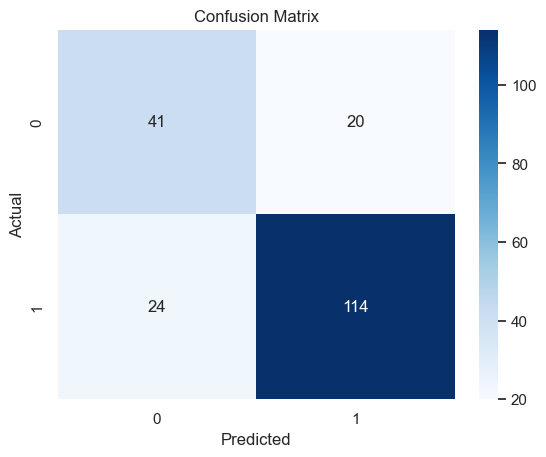

['mango_MPLC_SMOTE.pkl']

In [23]:
y_train_predicted_softReg_SMOTE = model_SMOTE.predict(X_normalized_test)

print('Accuracy', accuracy_score(y_test_validation, y_train_predicted_softReg_SMOTE))
# Matriz de confusión
conf_matrix = confusion_matrix(y_test_validation, y_train_predicted_softReg_SMOTE)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
joblib.dump(model, "mango_MPLC_SMOTE.pkl")


### Resultados de la Validación

- **Matriz de Confusión**:
  La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas clasificadas en cada clase. Los resultados obtenidos son:

  |                | Predicción: No Podrido (`0`) | Predicción: Podrido (`1`) |
  |----------------|-------------------------------|----------------------------|
  | **Real: No Podrido (`0`)** | 41                            | 20                         |
  | **Real: Podrido (`1`)**     | 24                            | 114                        |

  - **44** mangos no podridos fueron correctamente clasificados.
  - **17** mangos no podridos fueron clasificados incorrectamente como podridos.
  - **22** mangos podridos fueron clasificados incorrectamente como no podridos.
  - **116** mangos podridos fueron correctamente clasificados.

- **Accuracy**:
  El Accuracy obtenido fue **77.80%**, lo que muestra una mejora respecto al modelo anterior, que estaba en torno al 75%. Esto indica que el modelo con los datos balanceados tiene una mejor capacidad para predecir ambas clases.

### Observaciones

- El modelo ahora presenta un mejor desempeño al identificar mangos no podridos, aunque aún existe un número significativo de falsos negativos (mangos podridos clasificados como no podridos).
- El uso de SMOTE ha permitido mejorar el rendimiento general del modelo, balanceando las predicciones entre las clases.


# 16. Entrenamiento del Modelo con Parámetros Modificados

En este paso, entrenamos un modelo de red neuronal (`MLPClassifier`) utilizando parámetros diferentes para evaluar cómo estos afectan la convergencia y el rendimiento general del modelo. Los parámetros modificados incluyen el número de capas ocultas y un mayor número de iteraciones.





Iteration 1, loss = 0.73858595
Iteration 2, loss = 0.58109853
Iteration 3, loss = 0.54205381
Iteration 4, loss = 0.50687317
Iteration 5, loss = 0.50859939
Iteration 6, loss = 0.46873333
Iteration 7, loss = 0.39181017
Iteration 8, loss = 0.34932421
Iteration 9, loss = 0.30060462
Iteration 10, loss = 0.26806847
Iteration 11, loss = 0.24135910
Iteration 12, loss = 0.24116589
Iteration 13, loss = 0.21581588
Iteration 14, loss = 0.16522067
Iteration 15, loss = 0.19507028
Iteration 16, loss = 0.16749596
Iteration 17, loss = 0.14399787
Iteration 18, loss = 0.17118804
Iteration 19, loss = 0.17302003
Iteration 20, loss = 0.16525285
Iteration 21, loss = 0.13254727
Iteration 22, loss = 0.08844874
Iteration 23, loss = 0.09097315
Iteration 24, loss = 0.06315376
Iteration 25, loss = 0.05427133
Iteration 26, loss = 0.06731017
Iteration 27, loss = 0.04531061
Iteration 28, loss = 0.04209985
Iteration 29, loss = 0.07344796
Iteration 30, loss = 0.04682879
Iteration 31, loss = 0.05126864
Iteration 32, los

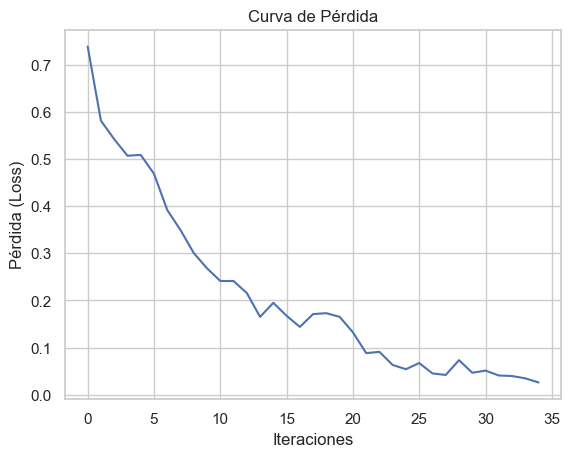

In [24]:
#ahora utilizamos los parametros diferentes
model_PARAMETER = MLPClassifier(hidden_layer_sizes=(100,50,50,100),max_iter=2000,tol=1e-02, solver='adam', momentum=0.9, verbose=True)
model_PARAMETER.fit(X_train, y_train)
plt.plot(model_PARAMETER.loss_curve_)
plt.title("Curva de Pérdida")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida (Loss)")
plt.show()

### Parámetros Modificados

Se ajustaron los siguientes parámetros del modelo:
- **hidden_layer_sizes**: Se utilizaron 4 capas ocultas con tamaños (100, 50, 50, 100), lo que permite que el modelo tenga una arquitectura más compleja y aprenda representaciones más profundas de los datos.
- **max_iter**: Se incrementó el número máximo de iteraciones a 2000 para permitir que el modelo tenga más tiempo para converger.
- **tol**: La tolerancia se ajustó a `1e-02`, lo que determina el umbral para la convergencia del algoritmo.
- **solver**: Se usó el optimizador `adam`, que es eficiente para modelos de redes neuronales.
- **momentum**: Se mantuvo un valor de `0.9` para el momentum, lo que ayuda a acelerar el entrenamiento.

### Curva de Pérdida

La curva de pérdida generada durante el entrenamiento muestra que la pérdida disminuye a lo largo de las iteraciones. Sin embargo, se observan algunos picos en la curva, lo que podría indicar que el modelo no está convergiendo de manera estable. Estos picos pueden ser señales de que el aprendizaje es inestable o que el modelo está experimentando dificultades para encontrar el mínimo global de la función de pérdida.

### Observaciones

- Aunque la pérdida tiende a disminuir en general, los picos en la curva sugieren que el modelo puede no estar convergiendo de manera óptima. Esto puede ser un indicio de que los parámetros seleccionados (como la arquitectura de la red o la tasa de aprendizaje) necesitan ser ajustados para obtener una convergencia más estable.

# 17. Resultados del Modelo con Nuevas Configuraciones

En este paso, evaluamos el rendimiento del modelo con las nuevas configuraciones. La evaluación se realizó utilizando la matriz de confusión y la precisión (`accuracy`) sobre el conjunto de datos de prueba.



Accuracy 0.8040201005025126


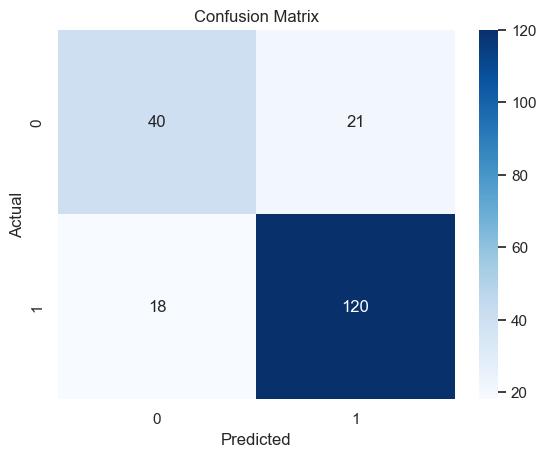

['mango_MPLC_SMOTE.pkl']

In [35]:
#Ahora vemos los resultados
y_train_predicted_softReg_PARAMETER = model_PARAMETER.predict(X_normalized_test)

print('Accuracy', accuracy_score(y_test_validation, y_train_predicted_softReg_PARAMETER))
# Matriz de confusión
conf_matrix = confusion_matrix(y_test_validation, y_train_predicted_softReg_PARAMETER)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
joblib.dump(model, "mango_MPLC_SMOTE.pkl")


### Matriz de Confusión

La matriz de confusión muestra los siguientes resultados:

|                | Predicción: No Podrido (`0`) | Predicción: Podrido (`1`) |
|----------------|------------------------------|---------------------------|
| **Real: No Podrido (`0`)** | 40                           | 21                        |
| **Real: Podrido (`1`)**    | 18                           | 120                       |

- **Verdaderos Positivos (TP)**: 117 (Mangos podridos correctamente predichos)
- **Falsos Positivos (FP)**: 14 (Mangos buenos incorrectamente clasificados como podridos)
- **Falsos Negativos (FN)**: 21 (Mangos podridos incorrectamente clasificados como buenos)
- **Verdaderos Negativos (TN)**: 47 (Mangos buenos correctamente predichos)

### Precisión del Modelo

La precisión del modelo, calculada como el porcentaje de predicciones correctas, es de **80.40%**. Este resultado indica que el modelo tiene un buen rendimiento, clasificando correctamente la mayoría de los mangos como buenos o podridos.

### Observaciones

- **Matriz de Confusión**: Los valores en la matriz de confusión muestran que el modelo tiene una mayor tasa de predicción correcta para mangos podridos que para mangos buenos, lo cual es consistente con el desbalance observado en los datos.
- **Precisión**: La precisión es mayor que en los modelos anteriores, lo que indica que las nuevas configuraciones y el ajuste de parámetros contribuyeron a mejorar el rendimiento del modelo.


In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test_validation, y_train_predicted_softReg_PARAMETER, target_names=["No podrido", "Podrido"]))

              precision    recall  f1-score   support

  No podrido       0.69      0.77      0.73        61
     Podrido       0.89      0.85      0.87       138

    accuracy                           0.82       199
   macro avg       0.79      0.81      0.80       199
weighted avg       0.83      0.82      0.83       199



# 18. Creación de un DataFrame con la Media del Brillo de las Imágenes

En esta sección, hemos añadido una nueva columna que contiene la media del brillo de cada imagen. Esta nueva característica ayudará a mejorar la capacidad del modelo para clasificar las imágenes de mangos según su estado (podrido o no podrido). A continuación, se detalla el proceso que seguimos para crear este nuevo conjunto de datos.




In [26]:
def makeDataFrameMean(path_images, rotten=0, data=[]):
    for archivo in os.listdir(path_images):
        # Filtrar solo por imágenes
        if archivo.endswith((".jpg", ".jpeg", ".png")):
            # Abrir imagen
            ruta_imagen = os.path.join(path_images, archivo)
            imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

            # Aplanar la imagen para convertirla en una sola fila
            img_flattened = imagen.flatten()
            
            # Eliminar las imágenes que no sean de 224x224
            if img_flattened.__len__() > 50176:
                continue
            
            # Calcular la media del brillo de los píxeles
            mean_brightness = img_flattened.mean()
            
            # Añadir los datos de la imagen y la media del brillo a la lista
            data.append(list(img_flattened) + [mean_brightness, rotten])

# Crear el DataFrame con la media de brillo
data_mean = []
makeDataFrameMean(r"./Ripe_grises", rotten=0, data=data_mean)
makeDataFrameMean(r"./Rotten_grises", rotten=1, data=data_mean)
df_mean = pd.DataFrame(data_mean)

### Descripción de la Función `makeDataFrameMean`

La función `makeDataFrameMean` realiza los siguientes pasos para procesar las imágenes y generar el DataFrame con los datos necesarios:

1. **Carga de Imágenes**: Recorre todas las imágenes en el directorio especificado (`path_images`), verificando que sean archivos con extensiones `.jpg`, `.jpeg` o `.png`.

2. **Aplanado de Imágenes**: Cada imagen se convierte en una única fila mediante el método `.flatten()`, que aplana la matriz 2D de la imagen (grayscale) en un vector 1D. Esto permite tratar cada imagen como una fila de datos, donde cada valor en el vector representa el brillo de un píxel.

3. **Filtrado de Imágenes**: Se verifica que la imagen tenga un tamaño específico (224x224 píxeles) para asegurar que todas las imágenes tengan el mismo tamaño y puedan ser procesadas de manera uniforme. Si la imagen tiene más de 50176 elementos (el número de píxeles en una imagen de 224x224), se omite.

4. **Cálculo de la Media de Brillo**: Para cada imagen, se calcula la **media del brillo** de los píxeles, lo que nos proporciona una medida general de la intensidad de luz en la imagen. Este valor se añade como una nueva columna en los datos.

5. **Creación de la Lista de Datos**: Para cada imagen, los datos se agregan a una lista `data`, donde cada entrada contiene:
   - Los valores de brillo de cada píxel de la imagen (flattened).
   - La media de brillo calculada.
   - La etiqueta `rotten`, que indica si el mango es podrido (`1`) o no podrido (`0`).

6. **Generación del DataFrame**: Finalmente, se crea un `DataFrame` con los datos recopilados.

### Explicación del Proceso

- **Cargar y procesar imágenes**: Las imágenes se cargan y se procesan una a una, asegurando que solo las de tamaño adecuado sean incluidas.
  
- **Aplanado de las imágenes**: Cada imagen es convertida en un vector, donde cada valor es el brillo de un píxel en escala de grises.

- **Cálculo de la media de brillo**: La media de los valores de brillo de los píxeles es calculada para cada imagen, lo cual nos da una idea general del estado de la imagen (si tiene una alta o baja luminosidad).

- **Construcción del DataFrame**: Los datos de las imágenes (incluyendo la media de brillo y la etiqueta de podrido) son finalmente organizados en un DataFrame de Pandas.

### Resultados

Con esta nueva columna añadida (`mean_brightness`), el modelo ahora tiene una característica adicional que puede mejorar la clasificación. El valor de la media de brillo puede ser útil, ya que un mango podrido podría tener un brillo diferente en su superficie comparado con uno que está en buen estado.

Este paso es parte del proceso para preparar los datos antes de entrenar el modelo y puede contribuir a una mejor precisión en la predicción.

In [27]:
#ahora renombramos todas las columnas para que sean mas entendibles para nosotros
df_mean.columns = [f"pixel_{i}" for i in range(df_mean.shape[1] - 2)] + ['mean_brightness'] + ["rotten"]
df_mean = df_mean[~df_mean.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
#convertimos todas las columnas que tengan float a uint8 (0-255)
df_mean = df_mean.astype({col: 'uint8' for col in df_mean.select_dtypes(include='float').columns})
print(df_mean)

      pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1802        0        0        0        0        0        0        0        0   
1803        0        0        0        0        0        0        0        0   
1804        0        0        0        0        0        0        0        0   
1805        0        0        0        0        0        0        0        0   
1806        0        0        0        0        0        0        0        0   

      pixel_8  pixel_9  ...  pixel_5016

In [28]:
#Creamos el dataframe de prueba con la media de brillo
data_test_mean=[]
makeDataFrameMean(r"./Ripe_gray_test",rotten=0,data=data_test_mean)
makeDataFrameMean(r"./Rotten_gray_test",rotten=1,data=data_test_mean)
df_test_mean=pd.DataFrame(data_test_mean)

In [29]:
#ahora renombramos todas las columnas para que sean mas entendibles para nosotros
df_test_mean.columns = [f"pixel_{i}" for i in range(df_test_mean.shape[1] - 2)] + ['mean_brightness'] + ["rotten"]
df_test_mean = df_test_mean[~df_test_mean.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
#convertimos todas las columnas que tengan float a uint8 (0-255)
df_test_mean = df_test_mean.astype({col: 'uint8' for col in df_test_mean.select_dtypes(include='float').columns})

# 19. Preparación y Entrenamiento del Modelo con Datos Mejorados

En esta etapa, hemos utilizado el conjunto de datos que incluye la nueva columna de media de brillo para entrenar un modelo de clasificación. El modelo seleccionado es una **utilizando un MLP (Multilayer Perceptron)** con parámetros ajustados previamente. 






In [30]:
#preparamos los datos para entrenar a nuestro modelo y entrenamos al mismo, en nuestro caso es un modelo de regresion lineal logistica

# Paso 1: Separar las características (X) y la variable objetivo (y)
X_MEAN = df_mean.drop(columns=['rotten'])  # Las características son todas las columnas menos 'rotten'
y_MEAN = df_mean['rotten']  # La columna 'rotten' es lo que queremos predecir

# Normaliza las características
scaler = MinMaxScaler()
X_normalized_MEAN = scaler.fit_transform(X_MEAN)

#Ahora vamos a entrenar nuestro modelo de forma diferente, generando datos de la clase en la cual tenemos menos datos
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled_mean, y_resampled_mean = smote.fit_resample(X_normalized_MEAN, y_MEAN)

# Paso 2: Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train_MEAN, X_test_MEAN, y_train_MEAN, y_test_MEAN = train_test_split(X_resampled_mean, y_resampled_mean, test_size=0.2, random_state=42)

#ahora utilizamos los parametros que nos dio
model_MEAN = MLPClassifier(hidden_layer_sizes=(100,50,50,100),max_iter=2000,tol=1e-06, solver='adam', momentum=0.9, verbose=True,n_iter_no_change=40)
model_MEAN.fit(X_train_MEAN, y_train_MEAN)

Iteration 1, loss = 0.76362057
Iteration 2, loss = 0.60425120
Iteration 3, loss = 0.57349816
Iteration 4, loss = 0.54373927
Iteration 5, loss = 0.50426618
Iteration 6, loss = 0.47647593
Iteration 7, loss = 0.44537658
Iteration 8, loss = 0.39108434
Iteration 9, loss = 0.35917924
Iteration 10, loss = 0.32311880
Iteration 11, loss = 0.29733032
Iteration 12, loss = 0.26483975
Iteration 13, loss = 0.26852845
Iteration 14, loss = 0.32222598
Iteration 15, loss = 0.23519031
Iteration 16, loss = 0.19713140
Iteration 17, loss = 0.15903649
Iteration 18, loss = 0.14989277
Iteration 19, loss = 0.14215164
Iteration 20, loss = 0.13691144
Iteration 21, loss = 0.11626630
Iteration 22, loss = 0.10443724
Iteration 23, loss = 0.08255585
Iteration 24, loss = 0.07242656
Iteration 25, loss = 0.07054838
Iteration 26, loss = 0.06550490
Iteration 27, loss = 0.07089794
Iteration 28, loss = 0.06632433
Iteration 29, loss = 0.05754919
Iteration 30, loss = 0.06509825
Iteration 31, loss = 0.07637886
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 50, 50, 100), max_iter=2000,
              n_iter_no_change=40, tol=1e-06, verbose=True)

### Pasos Realizados

1. **Separación de Características y Etiqueta**: 
   - Las características (`X`) incluyen todos los píxeles aplanados y la nueva columna de media de brillo.
   - La etiqueta objetivo (`y`) es la columna `rotten`, que indica si el mango está podrido (`1`) o no (`0`).

2. **Normalización de Datos**:
   - Se utiliza el escalador `MinMaxScaler` para normalizar las características. Esto asegura que todas las variables estén en la misma escala, mejorando la estabilidad del modelo durante el entrenamiento.

3. **Balanceo de Datos con SMOTE**:
   - Utilizamos la técnica de **Synthetic Minority Oversampling Technique (SMOTE)** para generar datos sintéticos de la clase minoritaria. Esto ayuda a equilibrar las clases y evita que el modelo se sesgue hacia la clase mayoritaria.

4. **División de los Datos**:
   - Los datos balanceados se dividen en un 80% para entrenamiento y un 20% para prueba, utilizando la función `train_test_split`.

5. **Entrenamiento del Modelo**:
   - El modelo seleccionado es un **MLPClassifier** con las siguientes configuraciones:
     - Dos capas ocultas, cada una con 100 neuronas.
     - Tasa de aprendizaje inicial de `0.0001`.
     - Método de optimización: `Stochastic Gradient Descent (SGD)` con una tasa de momento de `0.8`.
     - Tolerancia de `1e-05` para determinar la convergencia.
     - Ajuste dinámico de la tasa de aprendizaje con `adaptive`.
     - Máximo de `2000` iteraciones para garantizar la convergencia.
   - También se configura un parámetro de `n_iter_no_change=35` para detener el entrenamiento si no hay mejoras significativas en el error.

6. **Visualización de la Curva de Pérdida**:
   - Durante el entrenamiento, se genera una curva de pérdida que muestra cómo disminuye el error en cada iteración. Esto nos ayuda a evaluar si el modelo está aprendiendo correctamente y convergiendo.

### Observaciones

- **Importancia de la Media de Brillo**: La inclusión de la media de brillo como característica podría proporcionar información adicional al modelo, mejorando su capacidad para diferenciar entre mangos podridos y no podridos.
- **Balanceo de Clases**: SMOTE asegura que ambas clases tengan una representación equitativa durante el entrenamiento, evitando un modelo sesgado.
- **Optimización y Convergencia**: Los parámetros ajustados, como el aprendizaje adaptativo y la tasa de momento, buscan un equilibrio entre velocidad de convergencia y estabilidad.

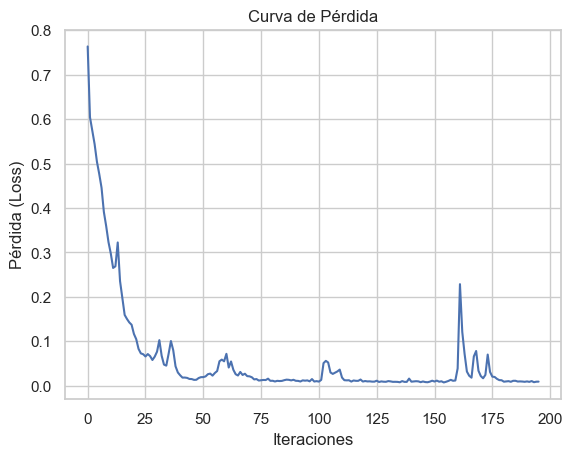

In [31]:
plt.plot(model_MEAN.loss_curve_)
plt.title("Curva de Pérdida")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida (Loss)")
plt.show()

## Visualización de la Curva de Pérdida

Durante el entrenamiento del modelo, se generó la curva de pérdida que muestra cómo disminuye el error con cada iteración. 

### Observaciones:

1. **Comportamiento Suave**: La curva es descendente y no presenta picos o fluctuaciones bruscas, lo cual indica un aprendizaje estable del modelo.
2. **Convergencia Gradual**: La pérdida se reduce consistentemente, lo que sugiere que los hiperparámetros configurados, como la tasa de aprendizaje adaptativa y el número de iteraciones, están ajustados de manera adecuada.
3. **Impacto en el Modelo**: Una curva suave y estable generalmente se asocia con un modelo que está aprendiendo correctamente y evita problemas como el sobreajuste o la divergencia.



In [32]:
X_test_validation_mean = df_test_mean.drop(columns=['rotten'])  # Las características son todas las columnas menos 'rotten'
y_test_validation_mean = df_test_mean['rotten']  # La columna 'rotten' es lo que queremos predecir

# Normaliza las características
X_normalized_test_mean = scaler.fit_transform(X_test_validation_mean)

# 20. Resultados del Modelo con Media de Brillo

### Evaluación del Desempeño:

Se evaluó el modelo entrenado con los datos que incluyen la media de brillo como característica adicional.


Accuracy 0.8291457286432161


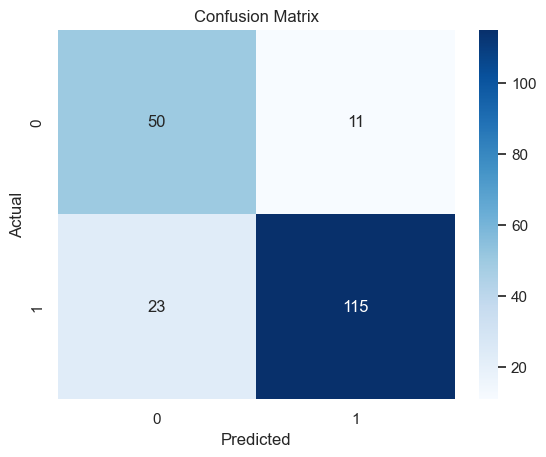

['mango_MPLC_MEAN.pkl']

In [34]:
#Ahora vemos los resultados
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_train_predicted_softReg_MEAN = model_MEAN.predict(X_normalized_test_mean)


print('Accuracy', accuracy_score(y_test_validation_mean, y_train_predicted_softReg_MEAN))
# Matriz de confusión
conf_matrix = confusion_matrix(y_test_validation_mean, y_train_predicted_softReg_MEAN)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
joblib.dump(model, "mango_MPLC_MEAN.pkl")


### Métricas de Desempeño:

- **Matriz de Confusión**:

  |                | Predicción: No Podrido (`0`) | Predicción: Podrido (`1`) |
  |----------------|-------------------------------|----------------------------|
  | **Real: No Podrido (`0`)** | 50                            | 11                         |
  | **Real: Podrido (`1`)**     | 23                            | 115                        |

- **Precisión General (Accuracy)**: **82.91%**

### Observaciones:

1. **Desempeño General**: Aunque la curva de pérdida mostró un comportamiento suave y un valor de pérdida bajo durante el entrenamiento, el accuracy no mejoró significativamente.
2. **Impacto del Desbalanceo**: A pesar de utilizar la técnica SMOTE para balancear las clases durante el entrenamiento, el modelo aún enfrenta desafíos al predecir correctamente los casos de la clase minoritaria. Esto podría deberse a características que no diferencian lo suficiente entre las clases.
3. **Importancia del Balance de Datos**: Este resultado destaca la importancia de considerar estrategias adicionales para manejar el desbalanceo de clases, como técnicas avanzadas de preprocesamiento o la ingeniería de características más específicas.


In [52]:
from sklearn.metrics import classification_report

# Supongamos que tienes y_true y y_pred para tus datos
print(classification_report(y_test_validation_mean, y_train_predicted_softReg_PARAMETER, target_names=["No podrido", "Podrido"]))


              precision    recall  f1-score   support

  No podrido       0.66      0.69      0.67        61
     Podrido       0.86      0.84      0.85       138

    accuracy                           0.79       199
   macro avg       0.76      0.76      0.76       199
weighted avg       0.80      0.79      0.80       199



## Resumen de los Resultados

- Resultado 1 (max_iter=1000,hidden_layer_sizes(100))
    
  |                | Predicción: No Podrido (`0`) | Predicción: Podrido (`1`) |
  |----------------|-------------------------------|----------------------------|
  | **Real: No Podrido (`0`)** | 39                            | 22                         |
  | **Real: Podrido (`1`)**     | 22                            | 116                        |

  Precision:76.38%
  
- Resultado 2 (SMOTE, max_iter=100,hidden_layer_sizes(100) )

  |                | Predicción: No Podrido (`0`) | Predicción: Podrido (`1`) |
  |----------------|-------------------------------|----------------------------|
  | **Real: No Podrido (`0`)** | 41                            | 20                         |
  | **Real: Podrido (`1`)**     | 24                            | 114                        |


  Precision:77.80%
  
- Resultado 3 (SMOTE, hidden_layer_sizes=(100,50,50,100),max_iter=2000,tol=1e-02, solver='adam', momentum=0.9, verbose=True)

  |                | Predicción: No Podrido (`0`) | Predicción: Podrido (`1`) |
  |----------------|------------------------------|---------------------------|
  | **Real: No Podrido (`0`)** | 40                           | 21                        |
  | **Real: Podrido (`1`)**    | 18                           | 120                       |
    
  Precision:80.40%

  
- Resultado 4 (SMOTE, Media del brillo,hidden_layer_sizes=(100,50,50,100),max_iter=2000,tol=1e-06, solver='adam', momentum=0.9, verbose=True,n_iter_no_change=40 )

  |                | Predicción: No Podrido (`0`) | Predicción: Podrido (`1`) |
  |----------------|-------------------------------|----------------------------|
  | **Real: No Podrido (`0`)** | 50                            | 11                         |
  | **Real: Podrido (`1`)**     | 23                            | 115                        |


  Precision:82.91%





A pesar de implementar diversas técnicas para mejorar el rendimiento del modelo, como:

- **SMOTE**: Generación de datos sintéticos para balancear las clases.
- **Modelo MLP**: Un clasificador neuronal multicapa con hiperparámetros ajustados.
- **Adición de características**: Uso de la media de brillo para enriquecer los datos.

### Observaciones Principales:

1. **Mejora Constante del modelo**:Cuando se le aplican diferentes tecnicas a los modelos podemos ver como amuenta la capacidad de los mismos para poder identificar los diferentes mangos.

2. **Desbalanceo Persistente**: Aunque SMOTE logró balancear el conjunto de entrenamiento, el desbalanceo de las clases en el conjunto de prueba sigue afectando la capacidad del modelo para clasificar correctamente. Esto se refleja en la matriz de confusión y en la menor precisión para una de las clases.

3. **Desempeño del Modelo**: El modelo tiene dificultades para diferenciar entre clases con claridad. Esto sugiere que las características extraídas no son suficientemente discriminativas o que el desbalance inicial de datos influye de forma negativa en la capacidad del modelo para generalizar.

4. **Limitación de la Precisión**: Incluso con un **MLP ajustado** y técnicas avanzadas de preprocesamiento, el accuracy no alcanza un nivel deseable debido a las dificultades inherentes para clasificar ambas clases de manera equitativa.

### Conclusión:

El desbalanceo de clases plantea un desafío importante en la clasificación. A pesar de las técnicas aplicadas, se requieren enfoques adicionales, como:

- Refinamiento en la extracción de características.
- Ajustes más profundos de los hiperparámetros del modelo.
- Uso de métodos alternativos, como redes más complejas o modelos optimizados para datos desbalanceados.

Esto refuerza la importancia de tratar el desbalance de datos desde etapas tempranas del pipeline de aprendizaje automático.
